# **Import Libraries and Load Dataset**

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
import tensorflow as tf
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.preprocessing import text, sequence
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Sequential
from keras.layers import Dense, Input, LSTM, SimpleRNN, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D,GRU
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, Add, Flatten
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

# For custom metrics
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping

# Install dependencies
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Double check with Python 3


In [ ]:
import os, re, csv, math, codecs
from tqdm import tqdm

In [ ]:
# pd.set_option('display.max_rows', 20)
# pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv("dataset_bayi_kelompok7.csv", encoding = "utf_8")
df.fillna(0, inplace=True)
df.head()

,No,Kalimat,Pasien,Usia Pasien,Penyakit,Gejala,Kapan,Periode,Tindakan,Outcome,Pertanyaan,Pembuka,Penyebab,Prakondisi,Observasi,Objek,Penutup,Referensi,Artikel
0,1,"Anak saya umur baru 1 bulan, kadang kalo tidur...",1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,"Alo, selamat malam bunda",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,dalam tidur terdapat 2 fase yaitu fase pertama...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,dalam fase initerdapat 3 fase,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,yang pertama mata menutup namun akan mudah dib...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Exploratory Data Analysis**

## **Jumlah kalimat di setiap kategori**

In [ ]:
df_category = df.drop(['No', 'Kalimat'], axis=1)
counts = []
categories = list(df_category.columns.values)
for i in categories:
    counts.append((i, df_category[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_sentences'])
df_stats.sort_values('number_of_sentences', ascending=False)

,category,number_of_sentences
6,Tindakan,298.0
7,Outcome,186.0
11,Prakondisi,176.0
3,Gejala,148.0
10,Penyebab,131.0
14,Penutup,91.0
8,Pertanyaan,85.0
9,Pembuka,83.0
2,Penyakit,70.0
0,Pasien,59.0


Text(0.5, 0, 'category')

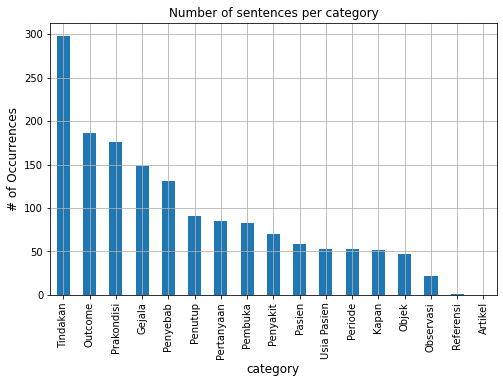

In [ ]:
df_stats.sort_values('number_of_sentences', ascending=False).plot(x='category', y='number_of_sentences', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of sentences per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)

# tidak ada teks yang berlabel 'Artikel', maka label 'Artikel' nanti tidak digunakan dalam pengembangan model

## **Kalimat dengan Multi labels**

Berapa banyak kalimat yang memiliki label lebih dari 1?


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, '# of categories')

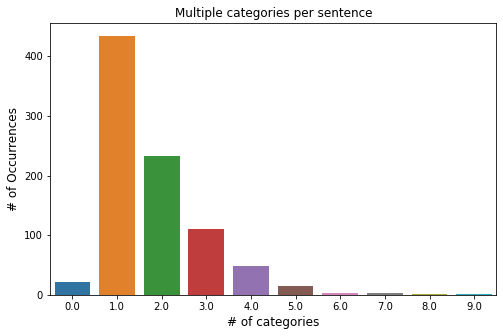

In [ ]:
rowsums = df.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple categories per sentence")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)

# dari grafik terlihat bahwa yang terbanyak adalah kalimat dengan 1  jenis label

In [ ]:
df.iloc[:,2:].sum(axis=1) # kalimat ke-0 mempunyai 7 label, kalimat ke-1 mempunyai 1 label, dst.

0      7.0
1      1.0
2      2.0
3      1.0
4      1.0
      ... 
864    1.0
865    4.0
866    4.0
867    1.0
868    1.0
Length: 869, dtype: float64

In [ ]:
print('Jumlah kalimat tanpa label:', rowsums[rowsums==0].count()) # terdapat 21 kalimat yang tidak berlabel
print('Persentase kalimat tanpa label:', rowsums[rowsums==0].count()/len(rowsums))

Jumlah kalimat tanpa label: 21
Persentase kalimat tanpa label: 0.024165707710011506


## **Distribusi "panjang karakter"** dari seluruh kalimat yang ada

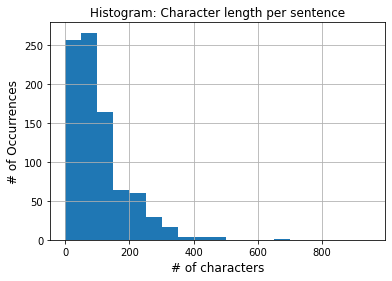

In [ ]:
lens = df.Kalimat.str.len()
lens.hist(bins = np.arange(0,1000,50))
plt.title('Histogram: Character length per sentence')
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of characters', fontsize=12)
plt.show()

# grafik menunjukkan bahwa umumnya sebuah kalimat memiliki panjang <= 200 karakter
# outlier : kalimat dengan panjang >200 hingga 800 karakter

## **Visualisasi word cloud: top 5 labels**

In [ ]:
top_5_labels = ['Tindakan','Outcome','Prakondisi','Gejala','Penyebab']

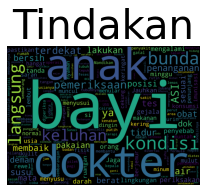

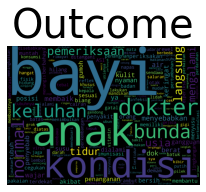

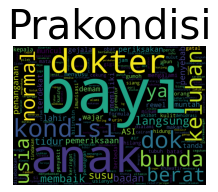

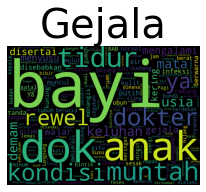

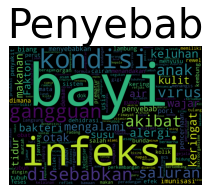

In [ ]:
from wordcloud import WordCloud

index_subplot = 1

for label in top_5_labels:
  plt.figure(figsize=(20,6))
  subset = df[df[label]==1]
  text = subset.iloc[:,1].values
  cloud_label = WordCloud(
                            stopwords=stop_words,
                            background_color='black',
                            collocations=False,
                            width=2500,
                            height=1800
                          ).generate(" ".join(text))

  # plt.subplot(4, 5, index_subplot)
  plt.subplot(1, 5, index_subplot)
  plt.axis('off')
  plt.title(label,fontsize=40)
  plt.imshow(cloud_label)
  plt.show()

  index_subplot=+1

## **Korelasi antar label**

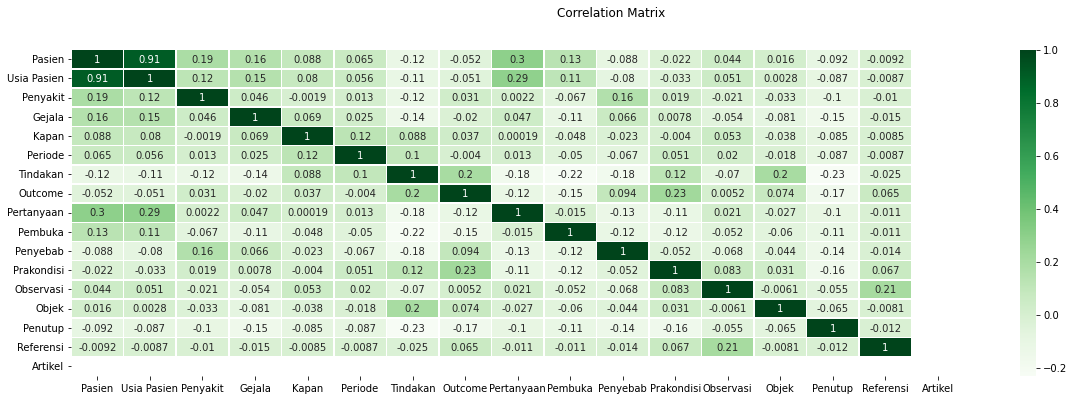

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
fig.suptitle('Correlation Matrix')
sns.heatmap(df.iloc[:,1:].corr(), annot=True, cmap="Greens", linewidths=.5, ax=ax)

## **Cek apakah ada missing values** pada kolom "Kalimat"

In [ ]:
df.Kalimat.isnull().sum()

# ternyata tidak ada missing values

0

## **Pilih label** yang akan digunakan

In [ ]:
df.columns

Index(['No', 'Kalimat', 'Pasien', 'Usia Pasien', 'Penyakit', 'Gejala', 'Kapan',
       'Periode', 'Tindakan', 'Outcome', 'Pertanyaan', 'Pembuka', 'Penyebab',
       'Prakondisi', 'Observasi', 'Objek', 'Penutup', 'Referensi', 'Artikel',
       'Kalimat (sesuai KBBI)'],
      dtype='object')

In [ ]:
#simpan nama label, kecuali label 'Artikel' dan 'Referensi'
# categories = ['Pasien', 'Usia Pasien', 'Penyakit', 'Gejala', 'Kapan', 'Periode',
#               'Tindakan', 'Outcome', 'Pertanyaan', 'Pembuka', 'Penyebab',
#               'Prakondisi', 'Observasi', 'Objek', 'Penutup']

In [ ]:
# drop label 'Artikel' dan 'Referensi dari tabel df
df.drop(columns=['Artikel','Referensi'],inplace=True)

## **Merging labels**

In [ ]:
def penyakit_kondisi_merge(row):
   if row['Penyakit'] == 1 :
      return 1
   elif row['Gejala']==1 :
      return 1
   elif row['Penyebab'] == 1 :
      return 1
   elif row['Prakondisi'] == 1:
      return 1
   elif row['Observasi']  == 1:
      return 1
   else:
     return 0

In [ ]:
def tindakan_outcome_objek_merge(row):
  if row['Tindakan']==1:
    return 1
  elif row['Outcome']==1:
    return 1
  elif row['Objek']==1:
    return 1
  else:
    return 0

In [ ]:
df.rename(columns={'Usia Pasien':'Usia Pasien_old'}, inplace=True)

In [ ]:
df['Usia Pasien'] = np.where(np.logical_or(df['Pasien']==1, df['Usia Pasien_old']==1), 1, 0)
df['Penyakit dan Kondisi Pasien'] = df.apply(lambda row: penyakit_kondisi_merge(row), axis=1)
df['Keterangan Waktu'] = np.where(np.logical_or(df['Kapan']==1, df['Periode']==1),1,0)
df['Tindakan dan Hasil Tindakan'] = df.apply(lambda row: tindakan_outcome_objek_merge(row), axis=1)
df['Pertanyaan'] = df['Pertanyaan']
df['Salam'] = np.where(np.logical_or(df['Pembuka']==1, df['Penutup']==1),1,0)

In [ ]:
label_new = ['Usia Pasien', 'Penyakit dan Kondisi Pasien', 'Keterangan Waktu', 'Tindakan dan Hasil Tindakan',
             'Pertanyaan', 'Salam']

# Buat **fungsi untuk membersihkan teks :**

1. ubah semua string menjadi lowercase
2. ubah kata slang ke dalam kata yang sesuai dengan KBBI
3. hapus special character, termasuk tanda baca (e.g. titik, koma, tanda petik)
4. mengubah whitespace Enter atau Tab menjadi 1 spasi ' '
5. menghapus spasi yang berlebihan menjadi 1 spasi ' '


In [ ]:
# membuat dictionary perbaikan kata slang/singkatan

slang = ['blg', 'gpp', 'bgmna', 'bgmn', 'mnrut', 'sufor', 'hri', 'hr', 'sya', 'sy', 'bbrp', 'yg', 'bis',
          'dlm', 'dri', 'dr', 'tmpt', 'tdk', 'tdi', 'td', 'byk', 'bngt', 'bgt', 'krna', 'krn','bln',
          'pgi', 'brdahak', 'lmyn', 'wlwpn', 'uda', 'udh', 'msi', 'msh', 'btuk', 'ksi', 'lgi', 'lg', 'stelah',
          'stlh', 'sblm', 'trims', 'terimakasih', 'musing', 'skrang', 'skg', 'skrg', 'gk', 'gak', 'tpi', 'tp', 'bronkitis',
          'kaya', 'kyk', 'abis', 'hbs', 'utk' ]
fixslang = ['bilang', 'tidak apa-apa', 'bagaimana', 'bagaimana', 'menurut', 'susu formula', 'hari', 'hari', 'saya', 'saya',
            'beberapa', 'yang', 'bisa', 'dalam', 'dari', 'dari', 'tempat', 'tidak', 'tadi', 'tadi', 'banyak', 'banget', 'banget',
            'karena', 'karena', 'bulan', 'pagi', 'berdahak', 'lumayan', 'walaupun', 'sudah', 'sudah', 'masih', 'masih', 'batuk',
            'kasih', 'lagi', 'lagi', 'setelah', 'setelah', 'sebelum', 'terima kasih', 'terima kasih', 'musim', 'sekarang', 'sekarang', 'sekarang',
            'tidak', 'tidak', 'tapi', 'tapi', 'bronkhitis', 'kayak', 'kayak', 'setelah', 'habis', 'untuk']
dictslang = dict(zip(slang, fixslang))

import itertools
dict(itertools.islice(dictslang.items(), 5))

{'blg': 'bilang',
 'gpp': 'tidak apa-apa',
 'bgmna': 'bagaimana',
 'bgmn': 'bagaimana',
 'mnrut': 'menurut'}

In [ ]:
# 1. mengubah teks menjadi lowercase
# 2. mengubah kata agar sesuai dengan KBBI
df['Kalimat (sesuai KBBI)'] = df['Kalimat'].str.lower().apply(lambda row: " ".join(dictslang[w] if w.lower() in dictslang else w for w in row.split()))

In [ ]:
def clean_text(text):
    text = re.sub('\W', ' ', text) # 3. hapus special character
    text = re.sub('\s+', ' ', text) # 4. mengubah whitespace Enter/Tab menjadi 1 spasi ' '
    text = text.strip(' ') # 5. hapus spasi yang berlebihan agar antar kata hanya dipisahkan oleh 1 spasi ' '
    return text

df['Kalimat (sesuai KBBI)']  = df['Kalimat (sesuai KBBI)'].map(lambda com : clean_text(com))

# **Membagi train dan test set**

In [ ]:
# train, test = train_test_split(df, random_state=42, test_size=0.3, shuffle=True) # train:test = 70:30
# train, test = train_test_split(df, random_state=42, test_size=0.2, shuffle=True) # train:test = 80:20
train, test = train_test_split(df, random_state=42, test_size=0.1, shuffle=True) # train:test = 90:10

In [ ]:
X_train = train['Kalimat (sesuai KBBI)']
X_test = test['Kalimat (sesuai KBBI)']
print(X_train.shape)
print(X_test.shape)

(782,)
(87,)


# **Membangun model Multilabelled Text Classification**

Dikarenakan berupa permasalahan multi-kelas, maka digunakan strategi OneVsRest dalam melatih model

## **Transformasi teks** sebelum membangun model ML

In [ ]:
# melakukan stemming terhadap tiap kata

stemmer = StemmerFactory().create_stemmer()

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

X_train = X_train.apply(stemming)
X_test = X_test.apply(stemming)

In [ ]:
# Vectorizer using tf-idf formula
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)

# Vectorizer using binary representation 0/1
# tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words,
#                                    binary=True,
#                                    norm=None,
#                                    use_idf=False,
#                                    smooth_idf=False)
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

In [ ]:
print('Vocabulary size:')
len(tfidf_vectorizer.vocabulary_)

Vocabulary size:


1183

## Algoritme 1: **Naive Bayes**

the results below is based on scenario of *70:30 train test split, Binary vectorization*

In [ ]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                # ('tfidf', TfidfVectorizer(stop_words = stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=False, class_prior=None)))
            ])

NB_accuracy = []
NB_f1score = []
NB_precision = []
NB_recall = []


for category in categories:
    print('... Processing {}'.format(category))

    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])

    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)

    NB_accuracy.extend([accuracy_score(test[category], prediction)])
    NB_f1score.extend([f1_score(test[category], prediction)])
    NB_precision.extend([precision_score(test[category], prediction)])
    NB_recall.extend([recall_score(test[category], prediction)])

NB_result = pd.DataFrame({'Label':categories,
                          'Accuracy':NB_accuracy,'F1-Score':NB_f1score,
                          'Precision':NB_precision,'Recall':NB_recall})
print('\nNaive Bayes Result:\n')
NB_result

... Processing Pasien
... Processing Usia Pasien
... Processing Penyakit
... Processing Gejala
... Processing Kapan
... Processing Periode
... Processing Tindakan
... Processing Outcome
... Processing Pertanyaan
... Processing Pembuka
... Processing Penyebab
... Processing Prakondisi
... Processing Observasi
... Processing Objek
... Processing Penutup

Naive Bayes Result:



,Label,Accuracy,F1-Score,Precision,Recall
0,Pasien,0.850575,0.338983,0.222222,0.714286
1,Usia Pasien,0.846743,0.259259,0.175000,0.500000
2,Penyakit,0.892720,0.440000,0.354839,0.578947
3,Gejala,0.808429,0.509804,0.393939,0.722222
4,Kapan,0.877395,0.304348,0.259259,0.368421
5,Periode,0.892720,0.333333,0.241379,0.538462
6,Tindakan,0.869732,0.828283,0.752294,0.921348
7,Outcome,0.735632,0.517483,0.456790,0.596774
8,Pertanyaan,0.816092,0.314286,0.224490,0.523810
9,Pembuka,0.888889,0.591549,0.456522,0.840000


In [ ]:
NB_result.Accuracy.mean()

0.8564495530012771

In [ ]:
NB_result['F1-Score'].mean()

0.4634879860580496

In [ ]:
NB_result['Precision'].mean()

0.37379127203311246

In [ ]:
NB_result['Recall'].mean()

0.642514591573516

## Algoritme 1: **Naive Bayes** (merged labels)

the results below is based on scenario of *90:10 train test split, TF-IDF*

In [ ]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                # ('tfidf', TfidfVectorizer(stop_words = stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=False, class_prior=None)))
            ])

NB_accuracy = []
NB_f1score = []
NB_precision = []
NB_recall = []


for label in label_new:
    print('... Processing {}'.format(label))

    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[label])

    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)

    NB_accuracy.extend([accuracy_score(test[label], prediction)])
    NB_f1score.extend([f1_score(test[label], prediction)])
    NB_precision.extend([precision_score(test[label], prediction)])
    NB_recall.extend([recall_score(test[label], prediction)])

NB_result = pd.DataFrame({'Label':label_new,
                          'Accuracy':NB_accuracy,'F1-Score':NB_f1score,
                          'Precision':NB_precision,'Recall':NB_recall})
print('\nNaive Bayes Result:\n')
NB_result

... Processing Usia Pasien
... Processing Penyakit dan Kondisi Pasien
... Processing Keterangan Waktu
... Processing Tindakan dan Hasil Tindakan
... Processing Pertanyaan
... Processing Salam

Naive Bayes Result:



,Label,Accuracy,F1-Score,Precision,Recall
0,Usia Pasien,0.816092,0.384615,0.277778,0.625000
1,Penyakit dan Kondisi Pasien,0.712644,0.691358,0.636364,0.756757
2,Keterangan Waktu,0.827586,0.285714,0.200000,0.500000
3,Tindakan dan Hasil Tindakan,0.816092,0.794872,0.794872,0.794872
4,Pertanyaan,0.758621,0.322581,0.238095,0.500000
5,Salam,0.919540,0.829268,0.772727,0.894737


In [ ]:
NB_result.Accuracy.mean()

0.8084291187739464

In [ ]:
NB_result['F1-Score'].mean()

0.55140140462284

In [ ]:
NB_result['Precision'].mean()

0.48663928663928663

In [ ]:
NB_result['Recall'].mean()

0.6785608989556358

## Algoritme 2: **LinearSVC**

the results below is based on scenario of *80:20 train test split, binary vectorization*

In [ ]:
SVC_pipeline = Pipeline([
                # ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(C=0.1,dual=False, class_weight='balanced', random_state=42), n_jobs=1)),
            ])

SVC_accuracy = []
SVC_f1score = []
SVC_precision = []
SVC_recall = []

for category in categories:
    print('... Processing {}'.format(category))

    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[category])

    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)

    SVC_accuracy.extend([accuracy_score(test[category], prediction)])
    SVC_f1score.extend([f1_score(test[category], prediction)])
    SVC_precision.extend([precision_score(test[category], prediction)])
    SVC_recall.extend([recall_score(test[category], prediction)])

SVC_result = pd.DataFrame({'Label':categories,
                            'Accuracy':SVC_accuracy,'F1-Score':SVC_f1score,
                            'Precision':SVC_precision,'Recall':SVC_recall})
print('\nLinearSVC Result:\n')
SVC_result

... Processing Pasien
... Processing Usia Pasien
... Processing Penyakit
... Processing Gejala
... Processing Kapan
... Processing Periode
... Processing Tindakan
... Processing Outcome
... Processing Pertanyaan
... Processing Pembuka
... Processing Penyebab
... Processing Prakondisi
... Processing Observasi
... Processing Objek
... Processing Penutup

LinearSVC Result:



,Label,Accuracy,F1-Score,Precision,Recall
0,Pasien,0.977011,0.833333,0.769231,0.909091
1,Usia Pasien,0.977011,0.818182,0.750000,0.900000
2,Penyakit,0.896552,0.400000,0.375000,0.428571
3,Gejala,0.925287,0.734694,0.642857,0.857143
4,Kapan,0.965517,0.700000,0.777778,0.636364
5,Periode,0.942529,0.285714,0.222222,0.400000
6,Tindakan,0.896552,0.852459,0.838710,0.866667
7,Outcome,0.787356,0.531646,0.567568,0.500000
8,Pertanyaan,0.890805,0.536585,0.423077,0.733333
9,Pembuka,0.936782,0.702703,0.650000,0.764706


In [ ]:
SVC_result.Accuracy.mean()

0.9199233716475096

In [ ]:
SVC_result['F1-Score'].mean()

0.6213495499868564

In [ ]:
SVC_result['Precision'].mean()

0.6651642390352068

In [ ]:
SVC_result['Recall'].mean()

0.6431409073468308

## Algoritme 2: **LinearSVC** (merged labels)

the results below is based on scenario of *90:10 train test split, TF-IDF*

In [ ]:
SVC_pipeline = Pipeline([
                # ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(C=0.1,dual=False, class_weight='balanced', random_state=42), n_jobs=1)),
            ])

SVC_accuracy = []
SVC_f1score = []
SVC_precision = []
SVC_recall = []

for label in label_new:
    print('... Processing {}'.format(label))

    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[label])

    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)

    SVC_accuracy.extend([accuracy_score(test[label], prediction)])
    SVC_f1score.extend([f1_score(test[label], prediction)])
    SVC_precision.extend([precision_score(test[label], prediction)])
    SVC_recall.extend([recall_score(test[label], prediction)])

SVC_result = pd.DataFrame({'Label':label_new,
                            'Accuracy':SVC_accuracy,'F1-Score':SVC_f1score,
                            'Precision':SVC_precision,'Recall':SVC_recall})
print('\nLinearSVC Result:\n')
SVC_result

... Processing Usia Pasien
... Processing Penyakit dan Kondisi Pasien
... Processing Keterangan Waktu
... Processing Tindakan dan Hasil Tindakan
... Processing Pertanyaan
... Processing Salam

LinearSVC Result:



,Label,Accuracy,F1-Score,Precision,Recall
0,Usia Pasien,0.931034,0.700000,0.583333,0.875000
1,Penyakit dan Kondisi Pasien,0.689655,0.666667,0.613636,0.729730
2,Keterangan Waktu,0.873563,0.352941,0.272727,0.500000
3,Tindakan dan Hasil Tindakan,0.839080,0.820513,0.820513,0.820513
4,Pertanyaan,0.885057,0.666667,0.500000,1.000000
5,Salam,0.954023,0.888889,0.941176,0.842105


In [ ]:
SVC_result.Accuracy.mean()

0.8620689655172414

In [ ]:
SVC_result['F1-Score'].mean()

0.6826127032009385

In [ ]:
SVC_result['Precision'].mean()

0.6218977101330042

In [ ]:
SVC_result['Recall'].mean()

0.7945579689000741

## Algoritme 3: **Logistic Regression**

the results below is based on scenario of *80:20 train test split, binary vectorization*

In [ ]:
LogReg_pipeline = Pipeline([
                # ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(C=0.1,class_weight='balanced', dual=False), n_jobs=1)),
            ])

LogReg_accuracy = []
LogReg_f1score = []
LogReg_precision = []
LogReg_recall = []

for category in categories:
    print('... Processing {}'.format(category))

    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])

    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)

    LogReg_accuracy.extend([accuracy_score(test[category], prediction)])
    LogReg_f1score.extend([f1_score(test[category], prediction)])
    LogReg_precision.extend([precision_score(test[category], prediction)])
    LogReg_recall.extend([recall_score(test[category], prediction)])

LogReg_result = pd.DataFrame({'Label':categories,
                              'Accuracy':LogReg_accuracy,'F1-Score':LogReg_f1score,
                              'Precision':LogReg_precision,'Recall':LogReg_recall})
print('\nLogReg Result:\n')
LogReg_result

... Processing Pasien
... Processing Usia Pasien
... Processing Penyakit
... Processing Gejala
... Processing Kapan
... Processing Periode
... Processing Tindakan
... Processing Outcome
... Processing Pertanyaan
... Processing Pembuka
... Processing Penyebab
... Processing Prakondisi
... Processing Observasi
... Processing Objek
... Processing Penutup

LogReg Result:



,Label,Accuracy,F1-Score,Precision,Recall
0,Pasien,0.954023,0.714286,0.588235,0.909091
1,Usia Pasien,0.982759,0.869565,0.769231,1.000000
2,Penyakit,0.896552,0.437500,0.388889,0.500000
3,Gejala,0.879310,0.588235,0.500000,0.714286
4,Kapan,0.936782,0.560000,0.500000,0.636364
5,Periode,0.925287,0.315789,0.214286,0.600000
6,Tindakan,0.839080,0.766667,0.766667,0.766667
7,Outcome,0.775862,0.571429,0.530612,0.619048
8,Pertanyaan,0.885057,0.545455,0.413793,0.800000
9,Pembuka,0.936782,0.702703,0.650000,0.764706


In [ ]:
LogReg_result.Accuracy.mean()

0.9057471264367816

In [ ]:
LogReg_result['F1-Score'].mean()

0.604718702821745

In [ ]:
LogReg_result['Precision'].mean()

0.5823419381837011

In [ ]:
LogReg_result['Recall'].mean()

0.6826455712974977

## Algoritme 3: **Logistic Regression** (merged labels)

the results below is based on scenario of *90:10 train test split, TF-IDF*

In [ ]:
LogReg_pipeline = Pipeline([
                # ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(C=0.1,class_weight='balanced', dual=False), n_jobs=1)),
            ])

LogReg_accuracy = []
LogReg_f1score = []
LogReg_precision = []
LogReg_recall = []

for label in label_new:
    print('... Processing {}'.format(label))

    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[label])

    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)

    LogReg_accuracy.extend([accuracy_score(test[label], prediction)])
    LogReg_f1score.extend([f1_score(test[label], prediction)])
    LogReg_precision.extend([precision_score(test[label], prediction)])
    LogReg_recall.extend([recall_score(test[label], prediction)])

LogReg_result = pd.DataFrame({'Label':label_new,
                              'Accuracy':LogReg_accuracy,'F1-Score':LogReg_f1score,
                              'Precision':LogReg_precision,'Recall':LogReg_recall})
print('\nLogReg Result:\n')
LogReg_result

... Processing Usia Pasien
... Processing Penyakit dan Kondisi Pasien
... Processing Keterangan Waktu
... Processing Tindakan dan Hasil Tindakan
... Processing Pertanyaan
... Processing Salam

LogReg Result:



,Label,Accuracy,F1-Score,Precision,Recall
0,Usia Pasien,0.908046,0.636364,0.500000,0.875000
1,Penyakit dan Kondisi Pasien,0.643678,0.693069,0.546875,0.945946
2,Keterangan Waktu,0.850575,0.315789,0.230769,0.500000
3,Tindakan dan Hasil Tindakan,0.850575,0.850575,0.770833,0.948718
4,Pertanyaan,0.908046,0.714286,0.555556,1.000000
5,Salam,0.954023,0.888889,0.941176,0.842105


In [ ]:
LogReg_result.Accuracy.mean()

0.8524904214559386

In [ ]:
LogReg_result['F1-Score'].mean()

0.6831619554661369

In [ ]:
LogReg_result['Precision'].mean()

0.5908682650410593

In [ ]:
LogReg_result['Recall'].mean()

0.8519615263036315

## Algoritme 3: **KNN**

the results below is based on scenario of *90:10 train test split, TF-IDF vectorization*

In [ ]:
KNN_pipeline = Pipeline([
                # ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1))),
            ])

KNN_accuracy = []
KNN_f1score = []
KNN_precision = []
KNN_recall = []

for category in categories:
    print('... Processing {}'.format(category))

    # train the model using X_dtm & y
    KNN_pipeline.fit(X_train, train[category])

    # compute the testing accuracy
    prediction = KNN_pipeline.predict(X_test)

    KNN_accuracy.extend([accuracy_score(test[category], prediction)])
    KNN_f1score.extend([f1_score(test[category], prediction)])
    KNN_precision.extend([precision_score(test[category], prediction)])
    KNN_recall.extend([recall_score(test[category], prediction)])

KNN_result = pd.DataFrame({'Label':categories,
                              'Accuracy':KNN_accuracy,'F1-Score':KNN_f1score,
                              'Precision':KNN_precision,'Recall':KNN_recall})
print('\nKNN Result:\n')
KNN_result

... Processing Pasien
... Processing Usia Pasien
... Processing Penyakit
... Processing Gejala
... Processing Kapan
... Processing Periode
... Processing Tindakan
... Processing Outcome
... Processing Pertanyaan
... Processing Pembuka
... Processing Penyebab
... Processing Prakondisi
... Processing Observasi
... Processing Objek
... Processing Penutup

KNN Result:



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Label,Accuracy,F1-Score,Precision,Recall
0,Pasien,0.919540,0.222222,1.000000,0.125000
1,Usia Pasien,0.942529,0.444444,1.000000,0.285714
2,Penyakit,0.954023,0.000000,0.000000,0.000000
3,Gejala,0.862069,0.142857,1.000000,0.076923
4,Kapan,0.965517,0.400000,1.000000,0.250000
5,Periode,0.965517,0.000000,0.000000,0.000000
6,Tindakan,0.873563,0.731707,0.833333,0.652174
7,Outcome,0.747126,0.083333,0.500000,0.045455
8,Pertanyaan,0.919540,0.461538,1.000000,0.300000
9,Pembuka,0.954023,0.777778,0.875000,0.700000


In [ ]:
KNN_result.Accuracy.mean()

0.9126436781609197

In [ ]:
KNN_result['F1-Score'].mean()

0.3011899302143205

In [ ]:
KNN_result['Precision'].mean()

0.6472222222222223

In [ ]:
KNN_result['Recall'].mean()

0.23831259320389758

## Algoritme 3: **KNN** (merged labels)

the results below is based on scenario of *90:10 train test split, TF-IDF vectorization*

In [ ]:
KNN_pipeline = Pipeline([
                # ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1))),
            ])

KNN_accuracy = []
KNN_f1score = []
KNN_precision = []
KNN_recall = []

for label in label_new:
    print('... Processing {}'.format(label))

    # train the model using X_dtm & y
    KNN_pipeline.fit(X_train, train[label])

    # compute the testing accuracy
    prediction = KNN_pipeline.predict(X_test)

    KNN_accuracy.extend([accuracy_score(test[label], prediction)])
    KNN_f1score.extend([f1_score(test[label], prediction)])
    KNN_precision.extend([precision_score(test[label], prediction)])
    KNN_recall.extend([recall_score(test[label], prediction)])

KNN_result = pd.DataFrame({'Label':label_new,
                              'Accuracy':KNN_accuracy,'F1-Score':KNN_f1score,
                              'Precision':KNN_precision,'Recall':KNN_recall})
print('\nKNN Result:\n')
KNN_result

... Processing Usia Pasien
... Processing Penyakit dan Kondisi Pasien
... Processing Keterangan Waktu
... Processing Tindakan dan Hasil Tindakan
... Processing Pertanyaan
... Processing Salam

KNN Result:



,Label,Accuracy,F1-Score,Precision,Recall
0,Usia Pasien,0.931034,0.400000,1.000000,0.250000
1,Penyakit dan Kondisi Pasien,0.735632,0.610169,0.818182,0.486486
2,Keterangan Waktu,0.931034,0.250000,0.500000,0.166667
3,Tindakan dan Hasil Tindakan,0.747126,0.633333,0.904762,0.487179
4,Pertanyaan,0.919540,0.461538,1.000000,0.300000
5,Salam,0.954023,0.888889,0.941176,0.842105


In [ ]:
KNN_result.Accuracy.mean()

0.8697318007662834

In [ ]:
KNN_result['F1-Score'].mean()

0.5406550292143513

In [ ]:
KNN_result['Precision'].mean()

0.8606866989219931

In [ ]:
KNN_result['Recall'].mean()

0.4220729839150892

## Algoritme 3: **Decision Tree**

the results below is based on scenario of *80:20 train test split, binary vectorization*

In [ ]:
DT_pipeline = Pipeline([
                # ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy',random_state=42))),
            ])

DT_accuracy = []
DT_f1score = []
DT_precision = []
DT_recall = []

for category in categories:
    print('... Processing {}'.format(category))

    # train the model using X_dtm & y
    DT_pipeline.fit(X_train, train[category])

    # compute the testing accuracy
    prediction = DT_pipeline.predict(X_test)

    DT_accuracy.extend([accuracy_score(test[category], prediction)])
    DT_f1score.extend([f1_score(test[category], prediction)])
    DT_precision.extend([precision_score(test[category], prediction)])
    DT_recall.extend([recall_score(test[category], prediction)])

DT_result = pd.DataFrame({'Label':categories,
                              'Accuracy':DT_accuracy,'F1-Score':DT_f1score,
                              'Precision':DT_precision,'Recall':DT_recall})
print('\nDT Result:\n')
DT_result

... Processing Pasien
... Processing Usia Pasien
... Processing Penyakit
... Processing Gejala
... Processing Kapan
... Processing Periode
... Processing Tindakan
... Processing Outcome
... Processing Pertanyaan
... Processing Pembuka
... Processing Penyebab
... Processing Prakondisi
... Processing Observasi
... Processing Objek
... Processing Penutup

DT Result:



,Label,Accuracy,F1-Score,Precision,Recall
0,Pasien,0.965517,0.769231,0.666667,0.909091
1,Usia Pasien,0.994253,0.952381,0.909091,1.000000
2,Penyakit,0.931034,0.500000,0.600000,0.428571
3,Gejala,0.885057,0.600000,0.517241,0.714286
4,Kapan,0.919540,0.300000,0.333333,0.272727
5,Periode,0.948276,0.307692,0.250000,0.400000
6,Tindakan,0.839080,0.758621,0.785714,0.733333
7,Outcome,0.770115,0.375000,0.545455,0.285714
8,Pertanyaan,0.919540,0.500000,0.538462,0.466667
9,Pembuka,0.971264,0.838710,0.928571,0.764706


In [ ]:
DT_result.Accuracy.mean()

0.9206896551724137

In [ ]:
DT_result['F1-Score'].mean()

0.5979398082982228

In [ ]:
DT_result['Precision'].mean()

0.6816356057735368

In [ ]:
DT_result['Recall'].mean()

0.5772394969292914

## Algoritme 3: **Decision Tree** (merged labels)

the results below is based on scenario of *90:10 train test split, TF-IDF*

In [ ]:
DT_pipeline = Pipeline([
                # ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy',random_state=42))),
            ])

DT_accuracy = []
DT_f1score = []
DT_precision = []
DT_recall = []

for label in label_new:
    print('... Processing {}'.format(label))

    # train the model using X_dtm & y
    DT_pipeline.fit(X_train, train[label])

    # compute the testing accuracy
    prediction = DT_pipeline.predict(X_test)

    DT_accuracy.extend([accuracy_score(test[label], prediction)])
    DT_f1score.extend([f1_score(test[label], prediction)])
    DT_precision.extend([precision_score(test[label], prediction)])
    DT_recall.extend([recall_score(test[label], prediction)])

DT_result = pd.DataFrame({'Label':label_new,
                              'Accuracy':DT_accuracy,'F1-Score':DT_f1score,
                              'Precision':DT_precision,'Recall':DT_recall})
print('\nDT Result:\n')
DT_result

... Processing Usia Pasien
... Processing Penyakit dan Kondisi Pasien
... Processing Keterangan Waktu
... Processing Tindakan dan Hasil Tindakan
... Processing Pertanyaan
... Processing Salam

DT Result:



,Label,Accuracy,F1-Score,Precision,Recall
0,Usia Pasien,0.977011,0.875000,0.875000,0.875000
1,Penyakit dan Kondisi Pasien,0.643678,0.550725,0.593750,0.513514
2,Keterangan Waktu,0.896552,0.307692,0.285714,0.333333
3,Tindakan dan Hasil Tindakan,0.770115,0.696970,0.851852,0.589744
4,Pertanyaan,0.931034,0.700000,0.700000,0.700000
5,Salam,0.965517,0.918919,0.944444,0.894737


In [ ]:
DT_result.Accuracy.mean()

0.8639846743295019

In [ ]:
DT_result['F1-Score'].mean()

0.6748842602103472

In [ ]:
DT_result['Precision'].mean()

0.7084600970017637

In [ ]:
DT_result['Recall'].mean()

0.6510545464492833

## Algoritme 3: **Random Forest**

the results below is based on scenario of *80:20 train test split, binary vectorization*

In [ ]:
RF_pipeline = Pipeline([
                # ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(RandomForestClassifier(max_features=None,random_state=42, n_jobs=-1,
                                                                   min_impurity_decrease=0.001,
                                                                   min_weight_fraction_leaf=0.001))),
            ])

RF_accuracy = []
RF_f1score = []
RF_precision = []
RF_recall = []

for category in categories:
    print('... Processing {}'.format(category))

    # train the model using X_dtm & y
    RF_pipeline.fit(X_train, train[category])

    # compute the testing accuracy
    prediction = RF_pipeline.predict(X_test)

    RF_accuracy.extend([accuracy_score(test[category], prediction)])
    RF_f1score.extend([f1_score(test[category], prediction)])
    RF_precision.extend([precision_score(test[category], prediction)])
    RF_recall.extend([recall_score(test[category], prediction)])

RF_result = pd.DataFrame({'Label':categories,
                              'Accuracy':RF_accuracy,'F1-Score':RF_f1score,
                              'Precision':RF_precision,'Recall':RF_recall})
print('\nRF Result:\n')
RF_result

... Processing Pasien
... Processing Usia Pasien
... Processing Penyakit
... Processing Gejala
... Processing Kapan
... Processing Periode
... Processing Tindakan
... Processing Outcome
... Processing Pertanyaan
... Processing Pembuka
... Processing Penyebab
... Processing Prakondisi
... Processing Observasi
... Processing Objek
... Processing Penutup

RF Result:



,Label,Accuracy,F1-Score,Precision,Recall
0,Pasien,0.982759,0.857143,0.900000,0.818182
1,Usia Pasien,0.988506,0.900000,0.900000,0.900000
2,Penyakit,0.931034,0.500000,0.600000,0.428571
3,Gejala,0.942529,0.761905,0.761905,0.761905
4,Kapan,0.954023,0.428571,1.000000,0.272727
5,Periode,0.965517,0.250000,0.333333,0.200000
6,Tindakan,0.879310,0.820513,0.842105,0.800000
7,Outcome,0.810345,0.400000,0.846154,0.261905
8,Pertanyaan,0.913793,0.347826,0.500000,0.266667
9,Pembuka,0.965517,0.812500,0.866667,0.764706


In [ ]:
RF_result.Accuracy.mean()

0.9344827586206895

In [ ]:
RF_result['F1-Score'].mean()

0.5990366769113301

In [ ]:
RF_result['Precision'].mean()

0.7908442580811001

In [ ]:
RF_result['Recall'].mean()

0.5254185222050909

## Algoritme 3: **Random Forest** (merged labels)

the results below is based on scenario of *90:10 train test split, TF-IDF*

In [ ]:
RF_pipeline = Pipeline([
                # ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(RandomForestClassifier(max_features=None,random_state=42, n_jobs=-1,
                                                                   min_impurity_decrease=0.001,
                                                                   min_weight_fraction_leaf=0.001))),
            ])

RF_accuracy = []
RF_f1score = []
RF_precision = []
RF_recall = []

for label in label_new:
    print('... Processing {}'.format(label))

    # train the model using X_dtm & y
    RF_pipeline.fit(X_train, train[label])

    # compute the testing accuracy
    prediction = RF_pipeline.predict(X_test)

    RF_accuracy.extend([accuracy_score(test[label], prediction)])
    RF_f1score.extend([f1_score(test[label], prediction)])
    RF_precision.extend([precision_score(test[label], prediction)])
    RF_recall.extend([recall_score(test[label], prediction)])

RF_result = pd.DataFrame({'Label':label_new,
                              'Accuracy':RF_accuracy,'F1-Score':RF_f1score,
                              'Precision':RF_precision,'Recall':RF_recall})
print('\nRF Result:\n')
RF_result

... Processing Usia Pasien
... Processing Penyakit dan Kondisi Pasien
... Processing Keterangan Waktu
... Processing Tindakan dan Hasil Tindakan
... Processing Pertanyaan
... Processing Salam

RF Result:



,Label,Accuracy,F1-Score,Precision,Recall
0,Usia Pasien,0.977011,0.875000,0.875000,0.875000
1,Penyakit dan Kondisi Pasien,0.747126,0.685714,0.727273,0.648649
2,Keterangan Waktu,0.942529,0.444444,0.666667,0.333333
3,Tindakan dan Hasil Tindakan,0.816092,0.777778,0.848485,0.717949
4,Pertanyaan,0.919540,0.588235,0.714286,0.500000
5,Salam,0.954023,0.888889,0.941176,0.842105


In [ ]:
RF_result.Accuracy.mean()

0.8927203065134098

In [ ]:
RF_result['F1-Score'].mean()

0.710010115157174

In [ ]:
RF_result['Precision'].mean()

0.7954810712163654

In [ ]:
RF_result['Recall'].mean()

0.6528393271814324

## Algoritme 3: **XGBoost**

the results below is based on scenario of *90:10 train test split, TF-IDF vectorization*

In [ ]:
XGB_pipeline = Pipeline([
                # ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(XGBClassifier(base_score=0.2, booster='gbtree', gamma=0,
                                                          learning_rate=0.1, n_estimators=500, reg_alpha=0, reg_lambda=1,
                                                          random_state=0, n_jobs=-1))),
            ])

XGB_accuracy = []
XGB_f1score = []
XGB_precision = []
XGB_recall = []

for category in categories:
    print('... Processing {}'.format(category))

    # train the model using X_dtm & y
    XGB_pipeline.fit(X_train, train[category])

    # compute the testing accuracy
    prediction = XGB_pipeline.predict(X_test)

    XGB_accuracy.extend([accuracy_score(test[category], prediction)])
    XGB_f1score.extend([f1_score(test[category], prediction)])
    XGB_precision.extend([precision_score(test[category], prediction)])
    XGB_recall.extend([recall_score(test[category], prediction)])

XGB_result = pd.DataFrame({'Label':categories,
                              'Accuracy':XGB_accuracy,'F1-Score':XGB_f1score,
                              'Precision':XGB_precision,'Recall':XGB_recall})
print('\nXGB Result:\n')
XGB_result

... Processing Pasien
... Processing Usia Pasien
... Processing Penyakit
... Processing Gejala
... Processing Kapan
... Processing Periode


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


... Processing Tindakan
... Processing Outcome
... Processing Pertanyaan
... Processing Pembuka
... Processing Penyebab
... Processing Prakondisi
... Processing Observasi
... Processing Objek
... Processing Penutup

XGB Result:



,Label,Accuracy,F1-Score,Precision,Recall
0,Pasien,0.965517,0.769231,1.000000,0.625000
1,Usia Pasien,0.988506,0.923077,1.000000,0.857143
2,Penyakit,0.942529,0.285714,0.333333,0.250000
3,Gejala,0.896552,0.571429,0.750000,0.461538
4,Kapan,0.965517,0.400000,1.000000,0.250000
5,Periode,0.977011,0.000000,0.000000,0.000000
6,Tindakan,0.896552,0.808511,0.791667,0.826087
7,Outcome,0.793103,0.357143,0.833333,0.227273
8,Pertanyaan,0.885057,0.375000,0.500000,0.300000
9,Pembuka,0.954023,0.777778,0.875000,0.700000


In [ ]:
XGB_result.Accuracy.mean()

0.9279693486590037

In [ ]:
XGB_result['F1-Score'].mean()

0.54191675919243

In [ ]:
XGB_result['Precision'].mean()

0.723015873015873

In [ ]:
XGB_result['Recall'].mean()

0.4704223916180438

## Algoritme 3: **XGBoost** (merged labels)

the results below is based on scenario of *90:10 train test split, TF-IDF vectorization*

In [ ]:
XGB_pipeline = Pipeline([
                # ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(XGBClassifier(base_score=0.2, booster='gbtree', gamma=0,
                                                          learning_rate=0.1, n_estimators=500, reg_alpha=0, reg_lambda=1,
                                                          random_state=0, n_jobs=-1))),
            ])

XGB_accuracy = []
XGB_f1score = []
XGB_precision = []
XGB_recall = []

for label in label_new:
    print('... Processing {}'.format(label))

    # train the model using X_dtm & y
    XGB_pipeline.fit(X_train, train[label])

    # compute the testing accuracy
    prediction = XGB_pipeline.predict(X_test)

    XGB_accuracy.extend([accuracy_score(test[label], prediction)])
    XGB_f1score.extend([f1_score(test[label], prediction)])
    XGB_precision.extend([precision_score(test[label], prediction)])
    XGB_recall.extend([recall_score(test[label], prediction)])

XGB_result = pd.DataFrame({'Label':label_new,
                              'Accuracy':XGB_accuracy,'F1-Score':XGB_f1score,
                              'Precision':XGB_precision,'Recall':XGB_recall})
print('\nXGB Result:\n')
XGB_result

... Processing Usia Pasien
... Processing Penyakit dan Kondisi Pasien
... Processing Keterangan Waktu
... Processing Tindakan dan Hasil Tindakan
... Processing Pertanyaan
... Processing Salam

XGB Result:



,Label,Accuracy,F1-Score,Precision,Recall
0,Usia Pasien,0.965517,0.769231,1.000000,0.625000
1,Penyakit dan Kondisi Pasien,0.747126,0.676471,0.741935,0.621622
2,Keterangan Waktu,0.942529,0.444444,0.666667,0.333333
3,Tindakan dan Hasil Tindakan,0.804598,0.753623,0.866667,0.666667
4,Pertanyaan,0.885057,0.375000,0.500000,0.300000
5,Salam,0.954023,0.888889,0.941176,0.842105


In [ ]:
XGB_result.Accuracy.mean()

0.8831417624521073

In [ ]:
XGB_result['F1-Score'].mean()

0.6512763132008657

In [ ]:
XGB_result['Precision'].mean()

0.7860742146320895

In [ ]:
XGB_result['Recall'].mean()

0.5647878141299193

## Algoritme 3: **Stacking**

the results below is based on scenario of *80:20 train test split, binary vectorization*

In [ ]:
# estimators = [('NB', NB_pipeline),
#               ('LinearSVC', SVC_pipeline),
#               ('LogReg', LogReg_pipeline),
#               ('KNN',KNN_pipeline),
#               ('DT',DT_pipeline),
#               ('RF', RF_pipeline),
#               ('XGBoost', XGB_pipeline)]

estimators = [('NB', Pipeline([('clf', OneVsRestClassifier(MultinomialNB(fit_prior=False, class_prior=None)))])),
              ('LinearSVC', Pipeline([('clf', OneVsRestClassifier(LinearSVC(C=0.1,dual=False, class_weight='balanced', random_state=42), n_jobs=-1)),])),
              ('LogReg', Pipeline([('clf', OneVsRestClassifier(LogisticRegression(C=0.1,class_weight='balanced', dual=False), n_jobs=-1))])),
              ('KNN', Pipeline([('clf', OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)))])),
              ('DT', Pipeline([('clf', OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy',random_state=42)))])),
              ('RF', Pipeline([('clf', OneVsRestClassifier(RandomForestClassifier(max_features=None,random_state=42, n_jobs=-1, min_impurity_decrease=0.001, min_weight_fraction_leaf=0.001)))])),
              ('XGBoost', Pipeline([('clf', OneVsRestClassifier(XGBClassifier(base_score=0.2, booster='gbtree', gamma=0, learning_rate=0.1, n_estimators=500, reg_alpha=0, reg_lambda=1, random_state=0, n_jobs=-1)))]))
              ]

In [ ]:
Stacking_pipeline = Pipeline([
                # ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), n_jobs=-1))),
            ])

Stacking_accuracy = []
Stacking_f1score = []
Stacking_precision = []
Stacking_recall = []

for category in categories:
    print('... Processing {}'.format(category))

    # train the model using X_dtm & y
    Stacking_pipeline.fit(X_train, train[category])

    # compute the testing accuracy
    prediction = Stacking_pipeline.predict(X_test)

    Stacking_accuracy.extend([accuracy_score(test[category], prediction)])
    Stacking_f1score.extend([f1_score(test[category], prediction)])
    Stacking_precision.extend([precision_score(test[category], prediction)])
    Stacking_recall.extend([recall_score(test[category], prediction)])

Stacking_result = pd.DataFrame({'Label':categories,
                              'Accuracy':Stacking_accuracy,'F1-Score':Stacking_f1score,
                              'Precision':Stacking_precision,'Recall':Stacking_recall})
print('\nStacking Result:\n')
Stacking_result

... Processing Pasien
... Processing Usia Pasien
... Processing Penyakit
... Processing Gejala
... Processing Kapan
... Processing Periode


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


... Processing Tindakan
... Processing Outcome
... Processing Pertanyaan
... Processing Pembuka
... Processing Penyebab
... Processing Prakondisi
... Processing Observasi
... Processing Objek
... Processing Penutup

Stacking Result:



,Label,Accuracy,F1-Score,Precision,Recall
0,Pasien,0.982759,0.857143,0.900000,0.818182
1,Usia Pasien,0.982759,0.857143,0.818182,0.900000
2,Penyakit,0.936782,0.421053,0.800000,0.285714
3,Gejala,0.948276,0.769231,0.833333,0.714286
4,Kapan,0.948276,0.400000,0.750000,0.272727
5,Periode,0.971264,0.000000,0.000000,0.000000
6,Tindakan,0.919540,0.879310,0.910714,0.850000
7,Outcome,0.775862,0.290909,0.615385,0.190476
8,Pertanyaan,0.936782,0.521739,0.750000,0.400000
9,Pembuka,0.965517,0.800000,0.923077,0.705882


In [ ]:
Stacking_result.Accuracy.mean()

0.9375478927203066

In [ ]:
Stacking_result['F1-Score'].mean()

0.5979148583422607

In [ ]:
Stacking_result['Precision'].mean()

0.7764097014097014

In [ ]:
Stacking_result['Recall'].mean()

0.5179481212349788

## Algoritme 3: **Stacking** (merged labels)

the results below is based on scenario of *90:10 train test split, TF-IDF*

In [ ]:
# estimators = [('NB', NB_pipeline),
#               ('LinearSVC', SVC_pipeline),
#               ('LogReg', LogReg_pipeline),
#               ('KNN',KNN_pipeline),
#               ('DT',DT_pipeline),
#               ('RF', RF_pipeline),
#               ('XGBoost', XGB_pipeline)]

estimators = [('NB', Pipeline([('clf', OneVsRestClassifier(MultinomialNB(fit_prior=False, class_prior=None)))])),
              ('LinearSVC', Pipeline([('clf', OneVsRestClassifier(LinearSVC(C=0.1,dual=False, class_weight='balanced', random_state=42), n_jobs=-1)),])),
              ('LogReg', Pipeline([('clf', OneVsRestClassifier(LogisticRegression(C=0.1,class_weight='balanced', dual=False), n_jobs=-1))])),
              ('KNN', Pipeline([('clf', OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)))])),
              ('DT', Pipeline([('clf', OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy',random_state=42)))])),
              ('RF', Pipeline([('clf', OneVsRestClassifier(RandomForestClassifier(max_features=None,random_state=42, n_jobs=-1, min_impurity_decrease=0.001, min_weight_fraction_leaf=0.001)))])),
              ('XGBoost', Pipeline([('clf', OneVsRestClassifier(XGBClassifier(base_score=0.2, booster='gbtree', gamma=0, learning_rate=0.1, n_estimators=500, reg_alpha=0, reg_lambda=1, random_state=0, n_jobs=-1)))]))
              ]

In [ ]:
Stacking_pipeline = Pipeline([
                # ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), n_jobs=-1))),
            ])

Stacking_accuracy = []
Stacking_f1score = []
Stacking_precision = []
Stacking_recall = []

for label in label_new:
    print('... Processing {}'.format(label))

    # train the model using X_dtm & y
    Stacking_pipeline.fit(X_train, train[label])

    # compute the testing accuracy
    prediction = Stacking_pipeline.predict(X_test)

    Stacking_accuracy.extend([accuracy_score(test[label], prediction)])
    Stacking_f1score.extend([f1_score(test[label], prediction)])
    Stacking_precision.extend([precision_score(test[label], prediction)])
    Stacking_recall.extend([recall_score(test[label], prediction)])

Stacking_result = pd.DataFrame({'Label':label_new,
                              'Accuracy':Stacking_accuracy,'F1-Score':Stacking_f1score,
                              'Precision':Stacking_precision,'Recall':Stacking_recall})
print('\nStacking Result:\n')
Stacking_result

... Processing Usia Pasien
... Processing Penyakit dan Kondisi Pasien
... Processing Keterangan Waktu
... Processing Tindakan dan Hasil Tindakan
... Processing Pertanyaan
... Processing Salam

Stacking Result:



,Label,Accuracy,F1-Score,Precision,Recall
0,Usia Pasien,0.977011,0.875000,0.875000,0.875000
1,Penyakit dan Kondisi Pasien,0.724138,0.666667,0.685714,0.648649
2,Keterangan Waktu,0.931034,0.400000,0.500000,0.333333
3,Tindakan dan Hasil Tindakan,0.827586,0.788732,0.875000,0.717949
4,Pertanyaan,0.954023,0.777778,0.875000,0.700000
5,Salam,0.954023,0.888889,0.941176,0.842105


In [ ]:
print('\n(Sorted based on F1-Score)\n')
Stacking_result[['Label','F1-Score','Accuracy','Precision','Recall']].sort_values('F1-Score',ascending=False)


(Sorted based on F1-Score)



,Label,F1-Score,Accuracy,Precision,Recall
5,Salam,0.888889,0.954023,0.941176,0.842105
0,Usia Pasien,0.875000,0.977011,0.875000,0.875000
3,Tindakan dan Hasil Tindakan,0.788732,0.827586,0.875000,0.717949
4,Pertanyaan,0.777778,0.954023,0.875000,0.700000
1,Penyakit dan Kondisi Pasien,0.666667,0.724138,0.685714,0.648649
2,Keterangan Waktu,0.400000,0.931034,0.500000,0.333333


In [ ]:
Stacking_result['F1-Score'].mean()

0.7328442879499217

In [ ]:
Stacking_result.Accuracy.mean()

0.8946360153256704

In [ ]:
Stacking_result['Precision'].mean()

0.7919817927170869

In [ ]:
Stacking_result['Recall'].mean()

0.6861726605147657

## **Eksperimen ML** dengan memvariasikan ***train:test ratio dan TF-IDF/binary represent.***

### Train:test ratio (70:30, 80:20, 90:10) dan TF-IDF

In [ ]:
# STEMMING, TF-IDF

Final_result_stemming_tfidf = pd.DataFrame({'Test size':[],
                                'Stemming/not':[],
                                'Vectorization':[],
                                'Algorithm':[],
                                'Accuracy':[],
                                'F1-Score':[],
                                'Precision':[],
                                'Recall':[]})

for testsize in [0.3, 0.2,0.1]:

  #cleaning text
  df['Kalimat (sesuai KBBI)'] = df['Kalimat'].str.lower().apply(lambda row: " ".join(dictslang[w] if w.lower() in dictslang else w for w in row.split()))
  df['Kalimat (sesuai KBBI)']  = df['Kalimat (sesuai KBBI)'].map(lambda com : clean_text(com))

  #train test split
  train, test = train_test_split(df, random_state=42, test_size=testsize, shuffle=True)
  X_train = train['Kalimat (sesuai KBBI)']
  X_test = test['Kalimat (sesuai KBBI)']

  #stemming
  X_train = X_train.apply(stemming)
  X_test = X_test.apply(stemming)

  # Vectorizer using tf-idf formula
  tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
  X_train = tfidf_vectorizer.fit_transform(X_train)
  X_test = tfidf_vectorizer.transform(X_test)

  #Define algorithm architecture first
  #Naive Bayes
  NB_pipeline = Pipeline([('clf', OneVsRestClassifier(MultinomialNB(fit_prior=False, class_prior=None)))])
  #Linear SVM
  SVC_pipeline = Pipeline([('clf', OneVsRestClassifier(LinearSVC(C=0.1,dual=False, class_weight='balanced', random_state=42), n_jobs=-1))])
  #Logistic Regression
  LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(C=0.1,class_weight='balanced', dual=False), n_jobs=-1))])
  #KNN
  KNN_pipeline = Pipeline([('clf', OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)))])
  #Decision Tree
  DT_pipeline = Pipeline([('clf', OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy',random_state=42)))])
  #Random Forest
  RF_pipeline = Pipeline([('clf', OneVsRestClassifier(RandomForestClassifier(max_features=None,random_state=42, n_jobs=-1, min_impurity_decrease=0.001, min_weight_fraction_leaf=0.001)))])
  #XGBoost
  XGB_pipeline = Pipeline([('clf', OneVsRestClassifier(XGBClassifier(base_score=0.2, booster='gbtree', gamma=0, learning_rate=0.1, n_estimators=500, reg_alpha=0, reg_lambda=1, random_state=0, n_jobs=-1)))])
  #Stacking
  estimators = [('NB', NB_pipeline),
                ('LinearSVC', SVC_pipeline),
                ('LogReg', LogReg_pipeline),
                ('KNN',KNN_pipeline),
                ('DT',DT_pipeline),
                ('RF', RF_pipeline),
                ('XGBoost', XGB_pipeline)]
  Stacking_pipeline = Pipeline([('clf', OneVsRestClassifier(StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), n_jobs=-1)))])

  #then, create algorithm lists to iterate over
  algorithm = [NB_pipeline, SVC_pipeline, LogReg_pipeline, KNN_pipeline, DT_pipeline, RF_pipeline, XGB_pipeline, Stacking_pipeline]

  #looping over each algorithm
  for alg in algorithm:
    # print(alg)
    accuracy = []
    f1score = []
    precision = []
    recall = []

    for category in categories:
      # print(category)

      # train the model
      alg.fit(X_train, train[category])

      # compute the testing accuracy
      prediction = alg.predict(X_test)

      accuracy.extend([accuracy_score(test[category], prediction)])
      f1score.extend([f1_score(test[category], prediction)])
      precision.extend([precision_score(test[category], prediction)])
      recall.extend([recall_score(test[category], prediction)])

    Final_result_stemming_tfidf = Final_result_stemming_tfidf.append({'Test size':testsize, 'Stemming/not':'stemming', 'Vectorization':'TF-IDF',
                                      'Algorithm':algorithm.index(alg),'Accuracy':sum(accuracy)/len(accuracy), 'F1-Score':sum(f1score)/len(f1score), 'Precision':sum(precision)/len(precision), 'Recall':sum(recall)/len(recall)},ignore_index=True)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.w

In [ ]:
# STEMMING, TF-IDF
# MERGED LABELS

Final_result_stemming_tfidf = pd.DataFrame({'Test size':[],
                                'Stemming/not':[],
                                'Vectorization':[],
                                'Algorithm':[],
                                'Accuracy':[],
                                'F1-Score':[],
                                'Precision':[],
                                'Recall':[]})

for testsize in [0.3, 0.2,0.1]:

  #cleaning text
  df['Kalimat (sesuai KBBI)'] = df['Kalimat'].str.lower().apply(lambda row: " ".join(dictslang[w] if w.lower() in dictslang else w for w in row.split()))
  df['Kalimat (sesuai KBBI)']  = df['Kalimat (sesuai KBBI)'].map(lambda com : clean_text(com))

  #train test split
  train, test = train_test_split(df, random_state=42, test_size=testsize, shuffle=True)
  X_train = train['Kalimat (sesuai KBBI)']
  X_test = test['Kalimat (sesuai KBBI)']

  #stemming
  X_train = X_train.apply(stemming)
  X_test = X_test.apply(stemming)

  # Vectorizer using tf-idf formula
  tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
  X_train = tfidf_vectorizer.fit_transform(X_train)
  X_test = tfidf_vectorizer.transform(X_test)

  #Define algorithm architecture first
  #Naive Bayes
  NB_pipeline = Pipeline([('clf', OneVsRestClassifier(MultinomialNB(fit_prior=False, class_prior=None)))])
  #Linear SVM
  SVC_pipeline = Pipeline([('clf', OneVsRestClassifier(LinearSVC(C=0.1,dual=False, class_weight='balanced', random_state=42), n_jobs=-1))])
  #Logistic Regression
  LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(C=0.1,class_weight='balanced', dual=False), n_jobs=-1))])
  #KNN
  KNN_pipeline = Pipeline([('clf', OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)))])
  #Decision Tree
  DT_pipeline = Pipeline([('clf', OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy',random_state=42)))])
  #Random Forest
  RF_pipeline = Pipeline([('clf', OneVsRestClassifier(RandomForestClassifier(max_features=None,random_state=42, n_jobs=-1, min_impurity_decrease=0.001, min_weight_fraction_leaf=0.001)))])
  #XGBoost
  XGB_pipeline = Pipeline([('clf', OneVsRestClassifier(XGBClassifier(base_score=0.2, booster='gbtree', gamma=0, learning_rate=0.1, n_estimators=500, reg_alpha=0, reg_lambda=1, random_state=0, n_jobs=-1)))])
  #Stacking
  estimators = [('NB', NB_pipeline),
                ('LinearSVC', SVC_pipeline),
                ('LogReg', LogReg_pipeline),
                ('KNN',KNN_pipeline),
                ('DT',DT_pipeline),
                ('RF', RF_pipeline),
                ('XGBoost', XGB_pipeline)]
  Stacking_pipeline = Pipeline([('clf', OneVsRestClassifier(StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), n_jobs=-1)))])

  #then, create algorithm lists to iterate over
  algorithm = [NB_pipeline, SVC_pipeline, LogReg_pipeline, KNN_pipeline, DT_pipeline, RF_pipeline, XGB_pipeline, Stacking_pipeline]

  #looping over each algorithm
  for alg in algorithm:
    # print(alg)
    accuracy = []
    f1score = []
    precision = []
    recall = []

    for label in label_new:
      # print(category)

      # train the model
      alg.fit(X_train, train[label])

      # compute the testing accuracy
      prediction = alg.predict(X_test)

      accuracy.extend([accuracy_score(test[label], prediction)])
      f1score.extend([f1_score(test[label], prediction)])
      precision.extend([precision_score(test[label], prediction)])
      recall.extend([recall_score(test[label], prediction)])

    Final_result_stemming_tfidf = Final_result_stemming_tfidf.append({'Test size':testsize, 'Stemming/not':'stemming', 'Vectorization':'TF-IDF',
                                      'Algorithm':algorithm.index(alg),'Accuracy':sum(accuracy)/len(accuracy), 'F1-Score':sum(f1score)/len(f1score), 'Precision':sum(precision)/len(precision), 'Recall':sum(recall)/len(recall)},ignore_index=True)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.w

###  Train:test ratio (70:30, 80:20, 90:10) dan Binary Vectorization

In [ ]:
# STEMMING, BINARY

Final_result_stemming_binary = pd.DataFrame({'Test size':[],
                                'Stemming/not':[],
                                'Vectorization':[],
                                'Algorithm':[],
                                'Accuracy':[],
                                'F1-Score':[],
                                'Precision':[],
                                'Recall':[]})

for testsize in [0.3,0.2,0.1]:

  #cleaning text
  df['Kalimat (sesuai KBBI)'] = df['Kalimat'].str.lower().apply(lambda row: " ".join(dictslang[w] if w.lower() in dictslang else w for w in row.split()))
  df['Kalimat (sesuai KBBI)']  = df['Kalimat (sesuai KBBI)'].map(lambda com : clean_text(com))

  #train test split
  train, test = train_test_split(df, random_state=42, test_size=testsize, shuffle=True)
  X_train = train['Kalimat (sesuai KBBI)']
  X_test = test['Kalimat (sesuai KBBI)']

  #stemming
  X_train = X_train.apply(stemming)
  X_test = X_test.apply(stemming)

  # Vectorizer using binary representation
  tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words,
                                   binary=True,
                                   norm=None,
                                   use_idf=False,
                                   smooth_idf=False)
  X_train = tfidf_vectorizer.fit_transform(X_train)
  X_test = tfidf_vectorizer.transform(X_test)

  #Define algorithm architecture first
  #Naive Bayes
  NB_pipeline = Pipeline([('clf', OneVsRestClassifier(MultinomialNB(fit_prior=False, class_prior=None)))])
  #Linear SVM
  SVC_pipeline = Pipeline([('clf', OneVsRestClassifier(LinearSVC(C=0.1,dual=False, class_weight='balanced', random_state=42), n_jobs=-1))])
  #Logistic Regression
  LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(C=0.1,class_weight='balanced', dual=False), n_jobs=-1))])
  #KNN
  KNN_pipeline = Pipeline([('clf', OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)))])
  #Decision Tree
  DT_pipeline = Pipeline([('clf', OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy',random_state=42)))])
  #Random Forest
  RF_pipeline = Pipeline([('clf', OneVsRestClassifier(RandomForestClassifier(max_features=None,random_state=42, n_jobs=-1, min_impurity_decrease=0.001, min_weight_fraction_leaf=0.001)))])
  #XGBoost
  XGB_pipeline = Pipeline([('clf', OneVsRestClassifier(XGBClassifier(base_score=0.2, booster='gbtree', gamma=0, learning_rate=0.1, n_estimators=500, reg_alpha=0, reg_lambda=1, random_state=0, n_jobs=-1)))])
  #Stacking
  estimators = [('NB', NB_pipeline),
                ('LinearSVC', SVC_pipeline),
                ('LogReg', LogReg_pipeline),
                ('KNN',KNN_pipeline),
                ('DT',DT_pipeline),
                ('RF', RF_pipeline),
                ('XGBoost', XGB_pipeline)]
  Stacking_pipeline = Pipeline([('clf', OneVsRestClassifier(StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), n_jobs=-1)))])

  #then, create algorithm lists to iterate over
  algorithm = [NB_pipeline, SVC_pipeline, LogReg_pipeline, KNN_pipeline, DT_pipeline, RF_pipeline, XGB_pipeline, Stacking_pipeline]

  #looping over each algorithm
  for alg in algorithm:
    # print(alg)
    accuracy = []
    f1score = []
    precision = []
    recall = []

    for category in categories:
      # print(category)

      # train the model
      alg.fit(X_train, train[category])

      # compute the testing accuracy
      prediction = alg.predict(X_test)

      accuracy.extend([accuracy_score(test[category], prediction)])
      f1score.extend([f1_score(test[category], prediction)])
      precision.extend([precision_score(test[category], prediction)])
      recall.extend([recall_score(test[category], prediction)])

    Final_result_stemming_binary = Final_result_stemming_binary.append({'Test size':testsize, 'Stemming/not':'stemming', 'Vectorization':'Binary',
                                      'Algorithm':algorithm.index(alg),'Accuracy':sum(accuracy)/len(accuracy), 'F1-Score':sum(f1score)/len(f1score), 'Precision':sum(precision)/len(precision), 'Recall':sum(recall)/len(recall)},ignore_index=True)

In [ ]:
# STEMMING, BINARY
# MERGED LABELS

Final_result_stemming_binary = pd.DataFrame({'Test size':[],
                                'Stemming/not':[],
                                'Vectorization':[],
                                'Algorithm':[],
                                'Accuracy':[],
                                'F1-Score':[],
                                'Precision':[],
                                'Recall':[]})

for testsize in [0.3,0.2,0.1]:

  #cleaning text
  df['Kalimat (sesuai KBBI)'] = df['Kalimat'].str.lower().apply(lambda row: " ".join(dictslang[w] if w.lower() in dictslang else w for w in row.split()))
  df['Kalimat (sesuai KBBI)']  = df['Kalimat (sesuai KBBI)'].map(lambda com : clean_text(com))

  #train test split
  train, test = train_test_split(df, random_state=42, test_size=testsize, shuffle=True)
  X_train = train['Kalimat (sesuai KBBI)']
  X_test = test['Kalimat (sesuai KBBI)']

  #stemming
  X_train = X_train.apply(stemming)
  X_test = X_test.apply(stemming)

  # Vectorizer using binary representation
  tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words,
                                   binary=True,
                                   norm=None,
                                   use_idf=False,
                                   smooth_idf=False)
  X_train = tfidf_vectorizer.fit_transform(X_train)
  X_test = tfidf_vectorizer.transform(X_test)

  #Define algorithm architecture first
  #Naive Bayes
  NB_pipeline = Pipeline([('clf', OneVsRestClassifier(MultinomialNB(fit_prior=False, class_prior=None)))])
  #Linear SVM
  SVC_pipeline = Pipeline([('clf', OneVsRestClassifier(LinearSVC(C=0.1,dual=False, class_weight='balanced', random_state=42), n_jobs=-1))])
  #Logistic Regression
  LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(C=0.1,class_weight='balanced', dual=False), n_jobs=-1))])
  #KNN
  KNN_pipeline = Pipeline([('clf', OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)))])
  #Decision Tree
  DT_pipeline = Pipeline([('clf', OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy',random_state=42)))])
  #Random Forest
  RF_pipeline = Pipeline([('clf', OneVsRestClassifier(RandomForestClassifier(max_features=None,random_state=42, n_jobs=-1, min_impurity_decrease=0.001, min_weight_fraction_leaf=0.001)))])
  #XGBoost
  XGB_pipeline = Pipeline([('clf', OneVsRestClassifier(XGBClassifier(base_score=0.2, booster='gbtree', gamma=0, learning_rate=0.1, n_estimators=500, reg_alpha=0, reg_lambda=1, random_state=0, n_jobs=-1)))])
  #Stacking
  estimators = [('NB', NB_pipeline),
                ('LinearSVC', SVC_pipeline),
                ('LogReg', LogReg_pipeline),
                ('KNN',KNN_pipeline),
                ('DT',DT_pipeline),
                ('RF', RF_pipeline),
                ('XGBoost', XGB_pipeline)]
  Stacking_pipeline = Pipeline([('clf', OneVsRestClassifier(StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), n_jobs=-1)))])

  #then, create algorithm lists to iterate over
  algorithm = [NB_pipeline, SVC_pipeline, LogReg_pipeline, KNN_pipeline, DT_pipeline, RF_pipeline, XGB_pipeline, Stacking_pipeline]

  #looping over each algorithm
  for alg in algorithm:
    # print(alg)
    accuracy = []
    f1score = []
    precision = []
    recall = []

    for label in label_new:
      # print(category)

      # train the model
      alg.fit(X_train, train[label])

      # compute the testing accuracy
      prediction = alg.predict(X_test)

      accuracy.extend([accuracy_score(test[label], prediction)])
      f1score.extend([f1_score(test[label], prediction)])
      precision.extend([precision_score(test[label], prediction)])
      recall.extend([recall_score(test[label], prediction)])

    Final_result_stemming_binary = Final_result_stemming_binary.append({'Test size':testsize, 'Stemming/not':'stemming', 'Vectorization':'Binary',
                                      'Algorithm':algorithm.index(alg),'Accuracy':sum(accuracy)/len(accuracy), 'F1-Score':sum(f1score)/len(f1score), 'Precision':sum(precision)/len(precision), 'Recall':sum(recall)/len(recall)},ignore_index=True)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.w

## HASIL MODEL BERBASIS ML

### **Hasil eksperimen**

In [ ]:
dict_rename_algorithm = {0: 'NB', 1:'LinSVM', 2:'LogReg', 3:'KNN', 4:'DT', 5:'RF', 6:'XGB', 7:'Stacking'}
Final_result_stemming_tfidf['Algorithm'] = Final_result_stemming_tfidf['Algorithm'].replace(dict_rename_algorithm)
Final_result_stemming_binary['Algorithm'] = Final_result_stemming_binary['Algorithm'].replace(dict_rename_algorithm)

In [ ]:
Final_result_ML_experiment = pd.concat([Final_result_stemming_binary,
                                     Final_result_stemming_tfidf])

Based on F1-score evaluation,

**BEST MODEL:** Linear SVM (80:20, Binary vectorization)



In [ ]:
max_f1score_ML = pd.concat([
    Final_result_stemming_binary[Final_result_stemming_binary['F1-Score']==Final_result_stemming_binary['F1-Score'].max()],
    Final_result_stemming_tfidf[Final_result_stemming_tfidf['F1-Score']==Final_result_stemming_tfidf['F1-Score'].max()]
    ])
print('\n(MERGED LABELS) Algorithm with Maximum F1-Score across all scenarios: Stacking\n')
max_f1score_ML[['Algorithm','Test size','Vectorization','F1-Score','Accuracy','Precision','Recall']].sort_values('F1-Score',ascending=False).head(1)


(MERGED LABELS) Algorithm with Maximum F1-Score across all scenarios: Stacking



,Algorithm,Test size,Vectorization,F1-Score,Accuracy,Precision,Recall
23,Stacking,0.1,TF-IDF,0.732844,0.894636,0.791982,0.686173


In [ ]:
max_f1score_ML = pd.concat([
    Final_result_stemming_binary[Final_result_stemming_binary['F1-Score']==Final_result_stemming_binary['F1-Score'].max()],
    Final_result_stemming_tfidf[Final_result_stemming_tfidf['F1-Score']==Final_result_stemming_tfidf['F1-Score'].max()]
    ])
print('\nAlgorithm with Maximum F1-Score across all scenarios: LINEAR SVM\n')
max_f1score_ML[['Algorithm','Test size','Vectorization','F1-Score','Accuracy','Precision','Recall']].sort_values('F1-Score',ascending=False)


Algorithm with Maximum F1-Score across all scenarios: LINEAR SVM



,Algorithm,Test size,Vectorization,F1-Score,Accuracy,Precision,Recall
9,LinSVM,0.2,Binary,0.621350,0.919923,0.665164,0.643141
9,LinSVM,0.2,TF-IDF,0.594199,0.904215,0.541202,0.679357


In [ ]:
max_acc_ML = pd.concat([
    Final_result_stemming_binary[Final_result_stemming_binary['Accuracy']==Final_result_stemming_binary['Accuracy'].max()],
    Final_result_stemming_tfidf[Final_result_stemming_tfidf['Accuracy']==Final_result_stemming_tfidf['Accuracy'].max()]
    ])
print('\nAlgorithm with Maximum Accuracy across all scenarios: STACKING\n')
max_acc_ML[['Algorithm','Test size','Vectorization','F1-Score','Accuracy','Precision','Recall']].sort_values('Accuracy',ascending=False)


Algorithm with Maximum Accuracy across all scenarios: STACKING



,Algorithm,Test size,Vectorization,F1-Score,Accuracy,Precision,Recall
15,Stacking,0.2,Binary,0.597915,0.937548,0.776410,0.517948
15,Stacking,0.2,TF-IDF,0.562056,0.932184,0.731917,0.492589


In [ ]:
max_acc_ML = pd.concat([
    Final_result_stemming_binary[Final_result_stemming_binary['Accuracy']==Final_result_stemming_binary['Accuracy'].max()],
    Final_result_stemming_tfidf[Final_result_stemming_tfidf['Accuracy']==Final_result_stemming_tfidf['Accuracy'].max()]
    ])
print('\n(MERGED LABELS) Algorithm with Maximum Accuracy across all scenarios: STACKING   \n')
max_acc_ML[['Algorithm','Test size','Vectorization','F1-Score','Accuracy','Precision','Recall']].sort_values('Accuracy',ascending=False).head(1)


(MERGED LABELS) Algorithm with Maximum Accuracy across all scenarios: STACKING



,Algorithm,Test size,Vectorization,F1-Score,Accuracy,Precision,Recall
7,Stacking,0.3,TF-IDF,0.721255,0.902299,0.799824,0.678177


**TOP 10 MODEL** based on F1-Score

In [ ]:
print('\nTOP 10 MODEL\n')
Final_result_ML_experiment[['Algorithm','Test size','Vectorization','F1-Score','Accuracy','Precision','Recall']].sort_values('F1-Score',ascending=False).head(10)


TOP 10 MODEL



,Algorithm,Test size,Vectorization,F1-Score,Accuracy,Precision,Recall
9,LinSVM,0.2,Binary,0.621350,0.919923,0.665164,0.643141
10,LogReg,0.2,Binary,0.604719,0.905747,0.582342,0.682646
13,RF,0.2,Binary,0.599037,0.934483,0.790844,0.525419
12,DT,0.2,Binary,0.597940,0.920690,0.681636,0.577239
15,Stacking,0.2,Binary,0.597915,0.937548,0.776410,0.517948
9,LinSVM,0.2,TF-IDF,0.594199,0.904215,0.541202,0.679357
1,LinSVM,0.3,Binary,0.585829,0.911367,0.620708,0.618786
10,LogReg,0.2,TF-IDF,0.583003,0.882759,0.515024,0.742341
1,LinSVM,0.3,TF-IDF,0.573040,0.896552,0.512342,0.677300
4,DT,0.3,Binary,0.572857,0.917241,0.616483,0.554791


In [ ]:
print('\n(MERGED LABELS) TOP 10 MODEL\n')
Final_result_ML_experiment[['Algorithm','Test size','Vectorization','F1-Score','Accuracy','Precision','Recall']].sort_values('F1-Score',ascending=False).head(10)


(MERGED LABELS) TOP 10 MODEL



,Algorithm,Test size,Vectorization,F1-Score,Accuracy,Precision,Recall
23,Stacking,0.1,TF-IDF,0.732844,0.894636,0.791982,0.686173
15,Stacking,0.2,TF-IDF,0.730349,0.901341,0.803759,0.686055
7,Stacking,0.3,Binary,0.721764,0.899745,0.838714,0.667995
7,Stacking,0.3,TF-IDF,0.721255,0.902299,0.799824,0.678177
1,LinSVM,0.3,Binary,0.715032,0.885057,0.715553,0.744820
15,Stacking,0.2,Binary,0.711652,0.897510,0.803167,0.663493
21,RF,0.1,TF-IDF,0.710010,0.892720,0.795481,0.652839
13,RF,0.2,TF-IDF,0.708340,0.887931,0.856074,0.637326
4,DT,0.3,Binary,0.708167,0.889527,0.736183,0.692277
10,LogReg,0.2,Binary,0.702750,0.880268,0.662769,0.779400


**BEST SCENARIO for EACH MODEL**

By focusing on F1-score performance evaluation:
- ALMOST ALL OF the best train test split ratio is **80:20** compared to 70:30 and 90:10 ratios
- MOSTLY, the best vectorization in this case is **Binary vectorization**  compared to TF-IDF
- even so, **Stemming and NO Stemming** are not consistently outperforming one another. **It depends on the kind of algorithm**. For instance, for LinearSVM, it is better without stemming. But, for Stacking, it is better with stemming instead.


In [ ]:
print('\nBEST SCENARIO for EACH MODEL\n')
best_scenario_each_model = pd.concat([Final_result_ML_experiment[Final_result_ML_experiment['F1-Score']==(Final_result_ML_experiment.loc[Final_result_ML_experiment['Algorithm']=='NB', 'F1-Score'].max())],
                                      Final_result_ML_experiment[Final_result_ML_experiment['F1-Score']==(Final_result_ML_experiment.loc[Final_result_ML_experiment['Algorithm']=='LinSVM', 'F1-Score'].max())],
                                      Final_result_ML_experiment[Final_result_ML_experiment['F1-Score']==(Final_result_ML_experiment.loc[Final_result_ML_experiment['Algorithm']=='LogReg', 'F1-Score'].max())],
                                      Final_result_ML_experiment[Final_result_ML_experiment['F1-Score']==(Final_result_ML_experiment.loc[Final_result_ML_experiment['Algorithm']=='KNN', 'F1-Score'].max())],
                                      Final_result_ML_experiment[Final_result_ML_experiment['F1-Score']==(Final_result_ML_experiment.loc[Final_result_ML_experiment['Algorithm']=='DT', 'F1-Score'].max())],
                                      Final_result_ML_experiment[Final_result_ML_experiment['F1-Score']==(Final_result_ML_experiment.loc[Final_result_ML_experiment['Algorithm']=='RF', 'F1-Score'].max())],
                                      Final_result_ML_experiment[Final_result_ML_experiment['F1-Score']==(Final_result_ML_experiment.loc[Final_result_ML_experiment['Algorithm']=='XGB', 'F1-Score'].max())],
                                      Final_result_ML_experiment[Final_result_ML_experiment['F1-Score']==(Final_result_ML_experiment.loc[Final_result_ML_experiment['Algorithm']=='Stacking', 'F1-Score'].max())]
                                      ])
best_scenario_each_model[['Algorithm','Test size','Vectorization','F1-Score','Accuracy','Precision','Recall']].sort_values('F1-Score',ascending=False)


BEST SCENARIO for EACH MODEL



,Algorithm,Test size,Vectorization,F1-Score,Accuracy,Precision,Recall
9,LinSVM,0.2,Binary,0.621350,0.919923,0.665164,0.643141
10,LogReg,0.2,Binary,0.604719,0.905747,0.582342,0.682646
13,RF,0.2,Binary,0.599037,0.934483,0.790844,0.525419
12,DT,0.2,Binary,0.597940,0.920690,0.681636,0.577239
15,Stacking,0.2,Binary,0.597915,0.937548,0.776410,0.517948
22,XGB,0.1,TF-IDF,0.541917,0.927969,0.723016,0.470422
0,NB,0.3,Binary,0.463488,0.856450,0.373791,0.642515
19,KNN,0.1,TF-IDF,0.301190,0.912644,0.647222,0.238313


In [ ]:
print('\n(MERGED LABELS) BEST SCENARIO for EACH MODEL\n')
best_scenario_each_model = pd.concat([Final_result_ML_experiment[Final_result_ML_experiment['F1-Score']==(Final_result_ML_experiment.loc[Final_result_ML_experiment['Algorithm']=='NB', 'F1-Score'].max())],
                                      Final_result_ML_experiment[Final_result_ML_experiment['F1-Score']==(Final_result_ML_experiment.loc[Final_result_ML_experiment['Algorithm']=='LinSVM', 'F1-Score'].max())],
                                      Final_result_ML_experiment[Final_result_ML_experiment['F1-Score']==(Final_result_ML_experiment.loc[Final_result_ML_experiment['Algorithm']=='LogReg', 'F1-Score'].max())],
                                      Final_result_ML_experiment[Final_result_ML_experiment['F1-Score']==(Final_result_ML_experiment.loc[Final_result_ML_experiment['Algorithm']=='KNN', 'F1-Score'].max())],
                                      Final_result_ML_experiment[Final_result_ML_experiment['F1-Score']==(Final_result_ML_experiment.loc[Final_result_ML_experiment['Algorithm']=='DT', 'F1-Score'].max())],
                                      Final_result_ML_experiment[Final_result_ML_experiment['F1-Score']==(Final_result_ML_experiment.loc[Final_result_ML_experiment['Algorithm']=='RF', 'F1-Score'].max())],
                                      Final_result_ML_experiment[Final_result_ML_experiment['F1-Score']==(Final_result_ML_experiment.loc[Final_result_ML_experiment['Algorithm']=='XGB', 'F1-Score'].max())],
                                      Final_result_ML_experiment[Final_result_ML_experiment['F1-Score']==(Final_result_ML_experiment.loc[Final_result_ML_experiment['Algorithm']=='Stacking', 'F1-Score'].max())]
                                      ])
best_scenario_each_model[['Algorithm','Test size','Vectorization','F1-Score','Accuracy','Precision','Recall']].sort_values('F1-Score',ascending=False)


(MERGED LABELS) BEST SCENARIO for EACH MODEL



,Algorithm,Test size,Vectorization,F1-Score,Accuracy,Precision,Recall
23,Stacking,0.1,TF-IDF,0.732844,0.894636,0.791982,0.686173
1,LinSVM,0.3,Binary,0.715032,0.885057,0.715553,0.744820
21,RF,0.1,TF-IDF,0.710010,0.892720,0.795481,0.652839
4,DT,0.3,Binary,0.708167,0.889527,0.736183,0.692277
10,LogReg,0.2,Binary,0.702750,0.880268,0.662769,0.779400
6,XGB,0.3,Binary,0.672032,0.889527,0.809955,0.607401
0,NB,0.3,Binary,0.588314,0.842912,0.520670,0.724938
19,KNN,0.1,TF-IDF,0.540655,0.869732,0.860687,0.422073


### **Hasil prediksi terhadap setiap label**

Berikut adalah rata-rata keakuratan prediksi di setiap label dari kedelapan model yang dilatih dengan skenario terbaik

In [ ]:
predict_avg_score = pd.DataFrame({'Label':[],
                                  'Algorithm':[],
                                  'F1-Score':[],
                                  'Accuracy':[],
                                  'Precision':[],
                                  'Recall':[]})

results_model_best_scenario = [NB_result, SVC_result, LogReg_result, KNN_result, DT_result, RF_result, XGB_result, Stacking_result]

for category in categories:
  for index_result, result in enumerate(results_model_best_scenario):
    predict_avg_score = predict_avg_score.append({'Label':category,
                                                  'Algorithm':index_result,
                                                  'F1-Score':result.loc[result.Label==category, 'F1-Score'].values[0],
                                                  'Accuracy':result.loc[result.Label==category, 'Accuracy'].values[0],
                                                  'Precision':result.loc[result.Label==category, 'Precision'].values[0],
                                                  'Recall':result.loc[result.Label==category, 'Recall'].values[0]},ignore_index=True)

dict_rename_algorithm = {0: 'NB', 1:'LinSVM', 2:'LogReg', 3:'KNN', 4:'DT', 5:'RF', 6:'XGB', 7:'Stacking'}
predict_avg_score.Algorithm = predict_avg_score.Algorithm.replace(dict_rename_algorithm)

In [ ]:
print('\nAverage Score for each label prediction of BEST MODEL (LINEAR SVM, 80:20, binary) \n')
predict_avg_score[predict_avg_score.Algorithm=='LinSVM'].groupby('Label')[['F1-Score','Accuracy','Precision','Recall']].mean().sort_values('F1-Score',ascending=False)


Average Score for each label prediction of BEST MODEL (LINEAR SVM, 80:20, binary) 



,F1-Score,Accuracy,Precision,Recall
Label,,,,
Penutup,1.000000,1.000000,1.000000,1.000000
Tindakan,0.852459,0.896552,0.838710,0.866667
Pasien,0.833333,0.977011,0.769231,0.909091
Usia Pasien,0.818182,0.977011,0.750000,0.900000
Gejala,0.734694,0.925287,0.642857,0.857143
Pembuka,0.702703,0.936782,0.650000,0.764706
Kapan,0.700000,0.965517,0.777778,0.636364
Observasi,0.666667,0.988506,1.000000,0.500000
Penyebab,0.553191,0.879310,0.541667,0.565217


In [ ]:
print('\nAverage Score for each label prediction of ALL MODELS *each with BEST SUITED SCENARIO\n')
predict_avg_score.groupby('Label')[['F1-Score','Accuracy','Precision','Recall']].mean().sort_values('F1-Score',ascending=False)


Average Score for each label prediction of ALL MODELS *each with BEST SUITED SCENARIO



,F1-Score,Accuracy,Precision,Recall
Label,,,,
Penutup,0.960921,0.989943,0.933618,1.000000
Tindakan,0.805759,0.876676,0.815150,0.802034
Usia Pasien,0.753006,0.962883,0.790188,0.792857
Pembuka,0.750465,0.946600,0.778105,0.750588
Pasien,0.670196,0.949713,0.755794,0.728490
Gejala,0.584769,0.893439,0.674910,0.627824
Penyebab,0.564286,0.899665,0.741903,0.518259
Pertanyaan,0.450304,0.895833,0.543728,0.473810
Kapan,0.436615,0.941571,0.702546,0.369916


In [ ]:
predict_avg_score = pd.DataFrame({'Label':[],
                                  'Algorithm':[],
                                  'F1-Score':[],
                                  'Accuracy':[],
                                  'Precision':[],
                                  'Recall':[]})

results_model_best_scenario = [NB_result, SVC_result, LogReg_result, KNN_result, DT_result, RF_result, XGB_result, Stacking_result]

for label in label_new:
  for index_result, result in enumerate(results_model_best_scenario):
    predict_avg_score = predict_avg_score.append({'Label':label,
                                                  'Algorithm':index_result,
                                                  'F1-Score':result.loc[result.Label==label, 'F1-Score'].values[0],
                                                  'Accuracy':result.loc[result.Label==label, 'Accuracy'].values[0],
                                                  'Precision':result.loc[result.Label==label, 'Precision'].values[0],
                                                  'Recall':result.loc[result.Label==label, 'Recall'].values[0]},ignore_index=True)

dict_rename_algorithm = {0: 'NB', 1:'LinSVM', 2:'LogReg', 3:'KNN', 4:'DT', 5:'RF', 6:'XGB', 7:'Stacking'}
predict_avg_score.Algorithm = predict_avg_score.Algorithm.replace(dict_rename_algorithm)

NameError: ignored

In [ ]:
print('\n(MERGED LABELS) Average Score for each label prediction of BEST MODEL (LINEAR SVM, 80:20, binary) \n')
predict_avg_score[predict_avg_score.Algorithm=='LinSVM'].groupby('Label')[['F1-Score','Accuracy','Precision','Recall']].mean().sort_values('F1-Score',ascending=False)


Average Score for each label prediction of BEST MODEL (LINEAR SVM, 80:20, binary) 



,F1-Score,Accuracy,Precision,Recall
Label,,,,
Penutup,1.000000,1.000000,1.000000,1.000000
Tindakan,0.852459,0.896552,0.838710,0.866667
Pasien,0.833333,0.977011,0.769231,0.909091
Usia Pasien,0.818182,0.977011,0.750000,0.900000
Gejala,0.734694,0.925287,0.642857,0.857143
Pembuka,0.702703,0.936782,0.650000,0.764706
Kapan,0.700000,0.965517,0.777778,0.636364
Observasi,0.666667,0.988506,1.000000,0.500000
Penyebab,0.553191,0.879310,0.541667,0.565217


### **Kesimpulan Model ML**

Chosen algorithm: **LinearSVM** (*80:20 train test split ratio, binary vectorization*)

# Testing dengan data teks Q&A (topik Bayi) terkini dari alodokter.com

In [ ]:
# link https://www.alodokter.com/komunitas/topic/ciri-fisik-dan-bentuk-kepala-pada-bayi-down-syndrome

Teks 1:

Saya baru saja melahirkan dan saat ini usia bayi saya 2 bulan, Kalo dilihat2 kok ukuran kepala bayi saya lebih kecil dari bayi lainnya ya dan bentuk lehernya pendek..

In [ ]:
text_tes_asli = 'Saya baru saja melahirkan dan saat ini usia bayi saya 2 bulan, Kalo dilihat2 kok ukuran kepala bayi saya lebih kecil dari bayi lainnya ya dan bentuk lehernya pendek..'
text_tes = text_tes_asli.lower()
text_tes = " ".join(dictslang[w] if w.lower() in dictslang else w for w in text_tes.split())
text_tes = clean_text(text_tes)
text_tes = stemming(text_tes)

In [ ]:
# using best model : LinearSVM (80:20, binary vectorization)

SVC_pipeline = Pipeline([('clf', OneVsRestClassifier(LinearSVC(C=0.1,dual=False, class_weight='balanced', random_state=42), n_jobs=1))])

# 80:20, stemming, Binary vectorization
df['Kalimat (sesuai KBBI)'] = df['Kalimat'].str.lower().apply(lambda row: " ".join(dictslang[w] if w.lower() in dictslang else w for w in row.split()))
df['Kalimat (sesuai KBBI)']  = df['Kalimat (sesuai KBBI)'].map(lambda com : clean_text(com))
train, test = train_test_split(df, random_state=42, test_size=0.2, shuffle=True) # train:test = 80:20
X_train = train['Kalimat (sesuai KBBI)'].apply(stemming)
X_test = test['Kalimat (sesuai KBBI)'].apply(stemming)
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words,
                                   binary=True,
                                   norm=None,
                                   use_idf=False,
                                   smooth_idf=False)
X_train = tfidf_vectorizer.fit_transform(X_train)
text_tes_transf = tfidf_vectorizer.transform([text_tes])

# create variable 'pred' to store the prediction result
pred = []

# training Linear SVC and use it for predicting new data
for category in categories:
    # print('... Processing {}'.format(category))

    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[category])

    # compute the testing accuracy
    prediction = SVC_pipeline.predict(text_tes_transf)
    pred.append(prediction)

print('Teks:\n',text_tes,'\n')
print('Hasil prediksi:\n')
pred_df=pd.DataFrame({'label':categories,'predict':pred})
pred_df

Teks:
 saya baru saja lahir dan saat ini usia bayi saya 2 bulan kalo dilihat2 kok ukur kepala bayi saya lebih kecil dari bayi lain ya dan bentuk leher pendek 

Hasil prediksi:



/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


,label,predict
0,Pasien,[1.0]
1,Usia Pasien,[1.0]
2,Penyakit,[0.0]
3,Gejala,[0.0]
4,Kapan,[0.0]
5,Periode,[0.0]
6,Tindakan,[0.0]
7,Outcome,[0.0]
8,Pertanyaan,[0.0]
9,Pembuka,[0.0]


In [ ]:
# using best model : Stacking (90:10, TF-IDF)


# 90:10, stemming, TF-IDF
df['Kalimat (sesuai KBBI)'] = df['Kalimat'].str.lower().apply(lambda row: " ".join(dictslang[w] if w.lower() in dictslang else w for w in row.split()))
df['Kalimat (sesuai KBBI)']  = df['Kalimat (sesuai KBBI)'].map(lambda com : clean_text(com))
train, test = train_test_split(df, random_state=42, test_size=0.1, shuffle=True) # train:test = 90:10
X_train = train['Kalimat (sesuai KBBI)'].apply(stemming)
X_test = test['Kalimat (sesuai KBBI)'].apply(stemming)
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
X_train = tfidf_vectorizer.fit_transform(X_train)
text_tes_transf = tfidf_vectorizer.transform([text_tes])

# create variable 'pred' to store the prediction result
pred = []

# training Linear SVC and use it for predicting new data
for label in label_new:
    # print('... Processing {}'.format(category))

    # train the model using X_dtm & y
    Stacking_pipeline.fit(X_train, train[label])

    # compute the testing accuracy
    prediction = Stacking_pipeline.predict(text_tes_transf)
    pred.append(prediction)

print('Teks:\n',text_tes_asli,'\n')
print('Hasil prediksi:\n')
pred_df=pd.DataFrame({'label':label_new,'predict':pred})
pred_df

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


Teks:
 Saya baru saja melahirkan dan saat ini usia bayi saya 2 bulan, Kalo dilihat2 kok ukuran kepala bayi saya lebih kecil dari bayi lainnya ya dan bentuk lehernya pendek.. 

Hasil prediksi:



,label,predict
0,Usia Pasien,[1]
1,Penyakit dan Kondisi Pasien,[1]
2,Keterangan Waktu,[0]
3,Tindakan dan Hasil Tindakan,[0]
4,Pertanyaan,[0.0]
5,Salam,[0]


Teks 2:

Beberapa jenis kelainan fisik yang bisa diamati pada penderita Down syndrome ialah ukuran kepala yang lebih kecil, bagian belakang kepala datar, hidung dan mulut kecil, sudut mata luar naik ke atas, muncul bintik-bintik putih di iris mata, telinga kecil atau abnormal bentuknya, leher pendek, kulit leher belakang kendur, telapak tangan lebar dan hanya terdapat 1 garis tangan, tungkai kecil dan pendek jarinya, serta otot lemah dan sangat lentur.

In [ ]:
text_tes1 ='Beberapa jenis kelainan fisik yang bisa diamati pada penderita Down syndrome ialah ukuran kepala yang lebih kecil, bagian belakang kepala datar, hidung dan mulut kecil, sudut mata luar naik ke atas, muncul bintik-bintik putih di iris mata, telinga kecil atau abnormal bentuknya, leher pendek, kulit leher belakang kendur, telapak tangan lebar dan hanya terdapat 1 garis tangan, tungkai kecil dan pendek jarinya, serta otot lemah dan sangat lentur.'
text_tes1 = text_tes1_asli.lower()
text_tes1 = " ".join(dictslang[w] if w.lower() in dictslang else w for w in text_tes1.split())
text_tes1 = clean_text(text_tes1)
text_tes1 = stemming(text_tes1)
text_tes1_transf = tfidf_vectorizer.transform([text_tes1])
pred = []
for category in categories:
    # print('... Processing {}'.format(category))

    # compute the testing accuracy
    prediction = SVC_pipeline.predict(text_tes1_transf)
    pred.append(prediction)

print('Teks:\n',text_tes1,'\n')
print('Hasil prediksi:\n')
pred_df=pd.DataFrame({'label':categories,'predict':pred})
pred_df

Teks:
 beberapa jenis lain fisik yang bisa amat pada derita down syndrome ialah ukur kepala yang lebih kecil bagi belakang kepala datar hidung dan mulut kecil sudut mata luar naik ke atas muncul bintik bintik putih di iris mata telinga kecil atau abnormal bentuk leher pendek kulit leher belakang kendur telapak tangan lebar dan hanya dapat 1 garis tangan tungkai kecil dan pendek jari serta otot lemah dan sangat lentur 

Hasil prediksi:



,label,predict
0,Pasien,[0.0]
1,Usia Pasien,[0.0]
2,Penyakit,[0.0]
3,Gejala,[0.0]
4,Kapan,[0.0]
5,Periode,[0.0]
6,Tindakan,[0.0]
7,Outcome,[0.0]
8,Pertanyaan,[0.0]
9,Pembuka,[0.0]


In [ ]:
text_tes1_asli ='Beberapa jenis kelainan fisik yang bisa diamati pada penderita Down syndrome ialah ukuran kepala yang lebih kecil, bagian belakang kepala datar, hidung dan mulut kecil, sudut mata luar naik ke atas, muncul bintik-bintik putih di iris mata, telinga kecil atau abnormal bentuknya, leher pendek, kulit leher belakang kendur, telapak tangan lebar dan hanya terdapat 1 garis tangan, tungkai kecil dan pendek jarinya, serta otot lemah dan sangat lentur.'
text_tes1 = text_tes1_asli.lower()
text_tes1 = " ".join(dictslang[w] if w.lower() in dictslang else w for w in text_tes1.split())
text_tes1 = clean_text(text_tes1)
text_tes1 = stemming(text_tes1)
text_tes1_transf = tfidf_vectorizer.transform([text_tes1])
pred = []
for label in label_new:
    # print('... Processing {}'.format(category))

    # train the model using X_dtm & y
    Stacking_pipeline.fit(X_train, train[label])

    # compute the testing accuracy
    prediction = Stacking_pipeline.predict(text_tes1_transf)
    pred.append(prediction)

print('Teks:\n',text_tes1_asli,'\n')
print('Hasil prediksi:\n')
pred_df=pd.DataFrame({'label':label_new,'predict':pred})
pred_df

Teks:
 Beberapa jenis kelainan fisik yang bisa diamati pada penderita Down syndrome ialah ukuran kepala yang lebih kecil, bagian belakang kepala datar, hidung dan mulut kecil, sudut mata luar naik ke atas, muncul bintik-bintik putih di iris mata, telinga kecil atau abnormal bentuknya, leher pendek, kulit leher belakang kendur, telapak tangan lebar dan hanya terdapat 1 garis tangan, tungkai kecil dan pendek jarinya, serta otot lemah dan sangat lentur. 

Hasil prediksi:



,label,predict
0,Usia Pasien,[0]
1,Penyakit dan Kondisi Pasien,[1]
2,Keterangan Waktu,[0]
3,Tindakan dan Hasil Tindakan,[0]
4,Pertanyaan,[0.0]
5,Salam,[0]


In [ ]:
text_tes2_asli ='Selamat siang alodokter, dok saya ibu dari bayi usia 3 bulan, bayi saya sekitar 2 jam sekali nyusu, dia masih ASI dok, saya mau bertanya berapa sering ya bayi usia 3 bulan pipis selama sehari semalam ya?'
text_tes2 = text_tes2_asli.lower()
text_tes2 = " ".join(dictslang[w] if w.lower() in dictslang else w for w in text_tes2.split())
text_tes2 = clean_text(text_tes2)
text_tes2 = stemming(text_tes2)
text_tes2_transf = tfidf_vectorizer.transform([text_tes2])
pred = []
for label in label_new:
    # print('... Processing {}'.format(category))

    # train the model using X_dtm & y
    Stacking_pipeline.fit(X_train, train[label])

    # compute the testing accuracy
    prediction = Stacking_pipeline.predict(text_tes2_transf)
    pred.append(prediction)

print('Teks:\n',text_tes2_asli,'\n')
print('Hasil prediksi:\n')
pred_df=pd.DataFrame({'label':label_new,'predict':pred})
pred_df

Teks:
 Selamat siang alodokter, dok saya ibu dari bayi usia 3 bulan, bayi saya sekitar 2 jam sekali nyusu, dia masih ASI dok, saya mau bertanya berapa sering ya bayi usia 3 bulan pipis selama sehari semalam ya? 

Hasil prediksi:



,label,predict
0,Usia Pasien,[1]
1,Penyakit dan Kondisi Pasien,[0]
2,Keterangan Waktu,[0]
3,Tindakan dan Hasil Tindakan,[0]
4,Pertanyaan,[1.0]
5,Salam,[1]


# BATAS

## **Transformasi teks** sebelum membangun model berbasis **DL without Pre-trained embedding**

In [ ]:
num_words = 20000 #Max. workds to use per toxic comment
max_features = 200000 #Max. number of unique words in embeddinbg vector
max_len = 200 #Max. number of words per toxic comment to be use
embedding_dims = 128 #embedding vector output dimension
num_epochs = 15 # (before 5)number of epochs (number of times that the model is exposed to the training dataset)
val_split = 0.1
batch_size2 = 256 #(before 32)The **batch size** is the number of training examples in one forward/backward pass.
                  # In general, larger batch sizes result in faster progress in training, but don't always converge as quickly.
                  #Smaller batch sizes train slower, but can converge faster. And the higher the batch size, the more memory space you’ll need.


In [ ]:
train, test = train_test_split(df, random_state=42, test_size=0.2, shuffle=True)
X_train = train['Kalimat (sesuai KBBI)'].values
X_test = test['Kalimat (sesuai KBBI)'].values

y_train = train[categories].values
y_test  = test[categories].values

In [ ]:
#sentences Tokenization
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(list(X_train))

#Convert tokenized sentences to sequences
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# padding the sequences
X_train = pad_sequences(X_train, max_len)
X_test  = pad_sequences(X_test,  max_len)

print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)

vocab_size = len(tokenizer.word_index) + 1

print('vocab size:',vocab_size)

X_train shape: (695, 200)
X_test shape:  (174, 200)
vocab size: 1359


In [ ]:
X_train

array([[   0,    0,    0, ...,  139,    5,  128],
       [   0,    0,    0, ...,  412,  596,  776],
       [   0,    0,    0, ...,   18,   99,  202],
       ...,
       [   0,    0,    0, ...,    6,   68,   30],
       [   0,    0,    0, ...,    0,    0, 1358],
       [   0,    0,    0, ...,   24,   23,   26]], dtype=int32)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# We use cross validation to split arrays or matrices of train data into random train and validation subsets
X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, train_size =0.8, random_state=42)


In [ ]:
print(X_tra.shape)
print(y_tra.shape)

print(X_val.shape)
print(y_val.shape)

(556, 200)
(556, 16)
(139, 200)
(139, 16)


In [ ]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=4)

In [ ]:
#Import necessary libraries
4# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

  #Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def fbeta_score(y_true, y_pred, beta=1):
    '''Calculates the F score, the weighted harmonic mean of precision and recall.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    '''
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')

    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

def f1_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))

    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())

    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())

    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def auroc(y_true, y_pred):
    auc = tf.keras.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc


def fmeasure(y_true, y_pred):
    '''Calculates the f-measure, the harmonic mean of precision and recall.
    '''
    return fbeta_score(y_true, y_pred, beta=1)

#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


fscore = f1score = fmeasure


## Algoritme 4: **ANN without pre-trained embedding**

In [ ]:
nn_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    GlobalMaxPool1D(),
    Dense(64, activation = 'relu'),
    Dropout(0.3),
    Dense(16, activation = 'sigmoid')
])

nn_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy',mean_pred, f1_m,precision,recall])

nn_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 200, 128)          25600000  
                                                                 
 global_max_pooling1d_11 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 16)                1040      
                                                                 
Total params: 25,609,296
Trainable params: 25,609,296
Non-trainable params: 0
_________________________________________

In [ ]:
nn_model_fit = nn_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

nn_train_score = nn_model.evaluate(X_tra, y_tra, batch_size = batch_size2, verbose = 1)
print('Train loss:', nn_train_score[0])
print('Train accuracy:', nn_train_score[1])

Epoch 1/15
3/3 [==============================] - 2s 266ms/step - loss: 0.6782 - accuracy: 0.0234 - mean_pred: 0.4820 - f1_m: 0.1679 - precision: 0.1289 - recall: 0.3019 - val_loss: 0.5948 - val_accuracy: 0.0072 - val_mean_pred: 0.4293 - val_f1_m: 0.1466 - val_precision: 0.1423 - val_recall: 0.1512
Epoch 2/15
3/3 [==============================] - 0s 149ms/step - loss: 0.5650 - accuracy: 0.0216 - mean_pred: 0.3830 - f1_m: 0.1541 - precision: 0.1832 - recall: 0.1388 - val_loss: 0.4382 - val_accuracy: 0.0072 - val_mean_pred: 0.2685 - val_f1_m: 0.0369 - val_precision: 0.3846 - val_recall: 0.0194
Epoch 3/15
3/3 [==============================] - 0s 154ms/step - loss: 0.4193 - accuracy: 0.0324 - mean_pred: 0.2148 - f1_m: 0.0511 - precision: 0.1674 - recall: 0.0316 - val_loss: 0.3630 - val_accuracy: 0.0072 - val_mean_pred: 0.1040 - val_f1_m: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
3/3 [==============================] - 0s 157ms/step - loss: 0.3701 - accurac

In [ ]:
#Evaluate the NN accuracy base on the test dataset

nn_test_score = nn_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', nn_test_score[0])
print('Test Accuracy:', nn_test_score[1])

1/1 [==============================] - 0s 29ms/step - loss: 0.2451 - accuracy: 0.5977 - mean_pred: 0.1078 - f1_m: 0.3568 - precision: 0.8800 - recall: 0.2237
Test Loss: 0.2450786530971527
Test Accuracy: 0.5977011322975159


In [ ]:
#Predicting......
print('Predicting....')
y_pred = nn_model.predict(X_test,batch_size=batch_size2,verbose=1)

#F1-score result of NN
index=0
f1_score_NN = []
for category in categories:
  print(category)

  # finding best threshold
  fpr, tpr, thresholds = roc_curve(test[category], y_pred[:, index])
  auc = roc_auc_score(test[category], y_pred[:, index])
  gmeans = np.sqrt(tpr * (1-fpr))
  ix = np.argmax(gmeans)

  #print f1 score of each label
  print(f1_score(test[category], np.where(y_pred[:,index]<thresholds[ix],0,1)))
  f1_score_NN.append(f1_score(test[category], np.where(y_pred[:,index]<thresholds[ix],0,1)))
  index=+1

Predicting....
1/1 [==============================] - 0s 21ms/step
Pasien
0.1923076923076923
Usia Pasien
0.16901408450704225
Penyakit
0.21538461538461542
Gejala
0.25925925925925924
Kapan
0.15384615384615385
Periode
0.11904761904761907
Tindakan
0.5876288659793815
Outcome
0.44755244755244755
Pertanyaan
0.33766233766233766
Pembuka
0.1923076923076923
Penyebab
0.20634920634920634
Prakondisi
0.39024390243902435
Observasi
0.05454545454545455
Objek
0.15053763440860213
Penutup
0.19672131147540986
Referensi


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


ValueError: ignored

In [ ]:
# Average f1-score for all labels by LSTM model
sum(f1_score_NN)/len(f1_score_NN)

0.24482721847146255

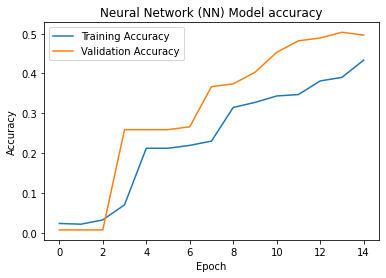

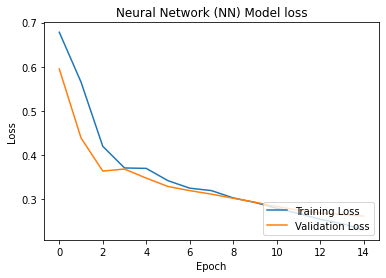

In [ ]:

# Plot Training & Validation Accuracy with the Loss values of the NN Model

# Plot training & validation accuracy values
plt.plot(nn_model_fit.history['accuracy'])
plt.plot(nn_model_fit.history['val_accuracy'])
plt.title('Neural Network (NN) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(nn_model_fit.history['loss'])
plt.plot(nn_model_fit.history['val_loss'])
plt.title('Neural Network (NN) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## Algoritme 5: **CNN without pre-trained embedding**

In [ ]:
CNN_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    SpatialDropout1D(0.5),
    # ... 100 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
    Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch,
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.
    #It will be added after the activation function between a convolutional and a max-pooling layer.
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(64, activation = 'relu'),
    Dense(16, activation = 'sigmoid')
])

CNN_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, f1_m, precision, recall])

CNN_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 200, 128)          25600000  
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 200, 128)         0         
 lDropout1D)                                                     
                                                                 
 conv1d_2 (Conv1D)           (None, 200, 100)          51300     
                                                                 
 batch_normalization_2 (Batc  (None, 200, 100)         400       
 hNormalization)                                                 
                                                                 
 dropout_14 (Dropout)        (None, 200, 100)          0         
                                                                 
 global_max_pooling1d_14 (Gl  (None, 100)            

In [ ]:
CNN_model_fit = CNN_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Epoch 1/15
3/3 [==============================] - 3s 505ms/step - loss: 1.1045 - accuracy: 0.1169 - mean_pred: 0.2755 - f1_m: 0.1547 - precision: 0.1307 - recall: 0.2984 - val_loss: 0.5693 - val_accuracy: 0.0000e+00 - val_mean_pred: 0.4138 - val_f1_m: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
3/3 [==============================] - 1s 383ms/step - loss: 0.4641 - accuracy: 0.1421 - mean_pred: 0.1294 - f1_m: 0.2166 - precision: 0.3030 - recall: 0.1849 - val_loss: 0.4989 - val_accuracy: 0.1223 - val_mean_pred: 0.3462 - val_f1_m: 0.1062 - val_precision: 0.2222 - val_recall: 0.0698
Epoch 3/15
3/3 [==============================] - 1s 363ms/step - loss: 0.3617 - accuracy: 0.2140 - mean_pred: 0.1604 - f1_m: 0.2104 - precision: 0.4102 - recall: 0.1457 - val_loss: 0.4532 - val_accuracy: 0.1223 - val_mean_pred: 0.2969 - val_f1_m: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
3/3 [==============================] - 1s 388ms/step - loss: 

In [ ]:
#Evaluate the CNN Model accuracy of our trained model

CNN_train_score = CNN_model.evaluate(X_tra, y_tra, batch_size = batch_size2, verbose = 1)
print('Train loss:', CNN_train_score[0])
print('Train accuracy:', CNN_train_score[1])

3/3 [==============================] - 0s 57ms/step - loss: 0.3974 - accuracy: 0.1781 - mean_pred: 0.2557 - f1_m: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Train loss: 0.39744046330451965
Train accuracy: 0.17805755138397217


In [ ]:
#Evaluate the CNN accuracy base our test samples

CNN_test_score = CNN_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', CNN_test_score[0])
print('Test Accuracy:', CNN_test_score[1])

1/1 [==============================] - 0s 77ms/step - loss: 0.3970 - accuracy: 0.1609 - mean_pred: 0.2559 - f1_m: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Test Loss: 0.3970072865486145
Test Accuracy: 0.16091954708099365


In [ ]:
#Predicting......
print('Predicting....')
y_pred = CNN_model.predict(X_test,batch_size=batch_size2,verbose=1)

Predicting....
1/1 [==============================] - 0s 147ms/step


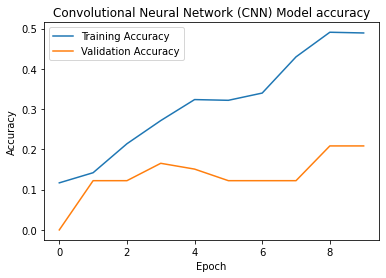

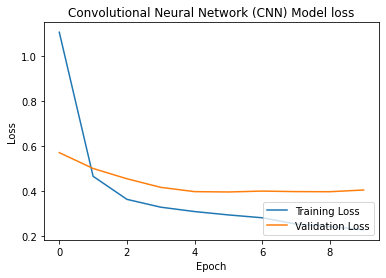

In [ ]:
#Plot Training & Validation Accuracy with the Loss values of the CNN Model

# Plot training & validation accuracy values
plt.plot(CNN_model_fit.history['accuracy'])
plt.plot(CNN_model_fit.history['val_accuracy'])
plt.title('Convolutional Neural Network (CNN) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(CNN_model_fit.history['loss'])
plt.plot(CNN_model_fit.history['val_loss'])
plt.title('Convolutional Neural Network (CNN) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## Algoritme 6: **RNN without pre-trained embedding**

In [ ]:
RNN_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    SpatialDropout1D(0.5),
    #Fully-connected RNN where the output is to be fed back to input.
    SimpleRNN(25, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch,
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(64, activation = 'relu'),
    Dense(16, activation = 'sigmoid')
])

RNN_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, f1_m, precision, recall])

RNN_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 200, 128)          25600000  
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 200, 128)         0         
 lDropout1D)                                                     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 200, 25)           3850      
                                                                 
 batch_normalization_6 (Batc  (None, 200, 25)          100       
 hNormalization)                                                 
                                                                 
 dropout_18 (Dropout)        (None, 200, 25)           0         
                                                                 
 global_max_pooling1d_18 (Gl  (None, 25)             

In [ ]:
RNN_model_fit = RNN_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Epoch 1/15
3/3 [==============================] - 3s 394ms/step - loss: 0.8235 - accuracy: 0.0252 - mean_pred: 0.2740 - f1_m: 0.1186 - precision: 0.1215 - recall: 0.1791 - val_loss: 0.5093 - val_accuracy: 0.2590 - val_mean_pred: 0.3601 - val_f1_m: 0.2519 - val_precision: 0.3597 - val_recall: 0.1938
Epoch 2/15
3/3 [==============================] - 1s 235ms/step - loss: 0.3694 - accuracy: 0.2212 - mean_pred: 0.1020 - f1_m: 0.0679 - precision: 0.1557 - recall: 0.0505 - val_loss: 0.4332 - val_accuracy: 0.2590 - val_mean_pred: 0.2792 - val_f1_m: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
3/3 [==============================] - 1s 245ms/step - loss: 0.3623 - accuracy: 0.2194 - mean_pred: 0.0781 - f1_m: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4158 - val_accuracy: 0.2590 - val_mean_pred: 0.2659 - val_f1_m: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
3/3 [==============================] - 1s 240ms/step 

In [ ]:
# Evaluate the RNN Model accuracy of our trained model

RNN_train_score = RNN_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', RNN_train_score[0])
print('Train Accuracy:', RNN_train_score[1])

3/3 [==============================] - 0s 27ms/step - loss: 0.3765 - accuracy: 0.2212 - mean_pred: 0.2296 - f1_m: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Train Loss: 0.3765093684196472
Train Accuracy: 0.22122302651405334


In [ ]:
# Evaluate the RNN accuracy base our test samples

RNN_test_score = RNN_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', RNN_test_score[0])
print('Test Accuracy:', RNN_test_score[1])

1/1 [==============================] - 0s 44ms/step - loss: 0.3708 - accuracy: 0.3046 - mean_pred: 0.2293 - f1_m: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Test Loss: 0.37075045704841614
Test Accuracy: 0.3045977056026459


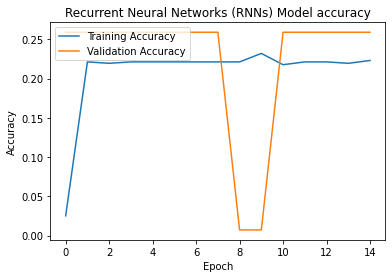

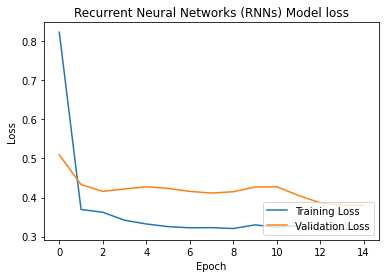

In [ ]:
# Plot Training & Validation Accuracy with the Loss values of the RNN Model

# Plot training & validation accuracy values
plt.plot(RNN_model_fit.history['accuracy'])
plt.plot(RNN_model_fit.history['val_accuracy'])
plt.title('Recurrent Neural Networks (RNNs) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(RNN_model_fit.history['loss'])
plt.plot(RNN_model_fit.history['val_loss'])
plt.title('Recurrent Neural Networks (RNNs) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## Algoritme 7: **LSTM without pre-trained embedding**

In [ ]:
LSTM_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    SpatialDropout1D(0.5),
    LSTM(128, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch,
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(64, activation = 'relu'),
    Dense(16, activation = 'sigmoid')
])

LSTM_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, f1_m, precision, recall])
LSTM_model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_40 (Embedding)    (None, 200, 128)          25600000  
                                                                 
 spatial_dropout1d_22 (Spati  (None, 200, 128)         0         
 alDropout1D)                                                    
                                                                 
 lstm_15 (LSTM)              (None, 200, 128)          131584    
                                                                 
 batch_normalization_20 (Bat  (None, 200, 128)         512       
 chNormalization)                                                
                                                                 
 dropout_33 (Dropout)        (None, 200, 128)          0         
                                                                 
 global_max_pooling1d_37 (Gl  (None, 128)            

In [ ]:
LSTM_model_fit = LSTM_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_split=val_split, callbacks=[early])

Epoch 1/15
3/3 [==============================] - 3s 1s/step - loss: 0.0347 - accuracy: 0.7328 - mean_pred: 0.1094 - f1_m: 0.9469 - precision: 0.9692 - recall: 0.9256 - val_loss: 0.2147 - val_accuracy: 0.6286 - val_mean_pred: 0.1092 - val_f1_m: 0.6326 - val_precision: 0.6667 - val_recall: 0.6018
Epoch 2/15
3/3 [==============================] - 3s 964ms/step - loss: 0.0299 - accuracy: 0.7200 - mean_pred: 0.1114 - f1_m: 0.9459 - precision: 0.9686 - recall: 0.9242 - val_loss: 0.2146 - val_accuracy: 0.6429 - val_mean_pred: 0.1102 - val_f1_m: 0.6168 - val_precision: 0.6535 - val_recall: 0.5841
Epoch 3/15
3/3 [==============================] - 3s 947ms/step - loss: 0.0262 - accuracy: 0.7008 - mean_pred: 0.1100 - f1_m: 0.9573 - precision: 0.9743 - recall: 0.9409 - val_loss: 0.2179 - val_accuracy: 0.6286 - val_mean_pred: 0.1155 - val_f1_m: 0.6368 - val_precision: 0.6455 - val_recall: 0.6283
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.0278 - accuracy: 0.6864 - mean_p

In [ ]:
# Evaluate the LSTM Model accuracy of our train and test accuracy

LSTM_train_score = LSTM_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', LSTM_train_score[0])
print('Train Accuracy:', LSTM_train_score[1])


LSTM_test_score = LSTM_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', LSTM_test_score[0])
print('Test Accuracy:', LSTM_test_score[1])

3/3 [==============================] - 1s 200ms/step - loss: 0.0339 - accuracy: 0.7032 - mean_pred: 0.1162 - f1_m: 0.9606 - precision: 0.9535 - recall: 0.9682
Train Loss: 0.03388439118862152
Train Accuracy: 0.7032374143600464
1/1 [==============================] - 0s 267ms/step - loss: 0.2344 - accuracy: 0.6667 - mean_pred: 0.1044 - f1_m: 0.6631 - precision: 0.7077 - recall: 0.6237
Test Loss: 0.23436017334461212
Test Accuracy: 0.6666666865348816


In [ ]:
#Predicting......
print('Predicting....')
y_pred = LSTM_model.predict(X_test,batch_size=batch_size2,verbose=1)

#F1-score result of LSTM
index=0
f1_score_LSTM = []
for category in categories:
  print(category)

  # finding best threshold
  fpr, tpr, thresholds = roc_curve(test[category], y_pred[:, index])
  auc = roc_auc_score(test[category], y_pred[:, index])
  gmeans = np.sqrt(tpr * (1-fpr))
  ix = np.argmax(gmeans)

  #print f1 score of each label
  print(f1_score(test[category], np.where(y_pred[:,index]<thresholds[ix],0,1)))
  f1_score_LSTM.append(f1_score(test[category], np.where(y_pred[:,index]<thresholds[ix],0,1)))
  index=+1

Predicting....
1/1 [==============================] - 0s 239ms/step
Pasien
0.5641025641025641
Usia Pasien
0.5405405405405406
Penyakit
0.32727272727272727
Gejala
0.30588235294117644
Kapan
0.22222222222222224
Periode
0.08080808080808081
Tindakan
0.34117647058823525
Outcome
0.33093525179856115
Pertanyaan
0.3870967741935484
Pembuka
0.24285714285714285
Penyebab
0.3238095238095238
Prakondisi
0.26666666666666666
Observasi
0.10389610389610389
Objek
0.14754098360655737
Penutup
0.08247422680412371
Referensi


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


ValueError: ignored

In [ ]:
# Average f1-score for all labels by LSTM model
sum(f1_score_LSTM)/len(f1_score_LSTM)

0.2844854421405183

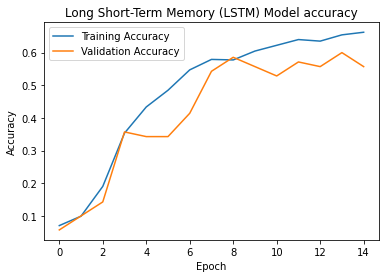

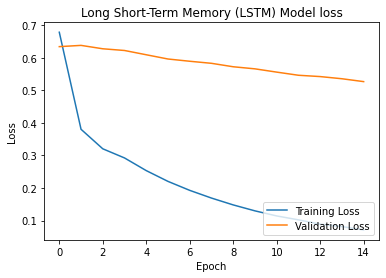

In [ ]:
# Plot Training & Validation Accuracy with the Loss values of the LSTM Model

# Plot training & validation accuracy values
plt.plot(LSTM_model_fit.history['accuracy'])
plt.plot(LSTM_model_fit.history['val_accuracy'])
plt.title('Long Short-Term Memory (LSTM) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training<<<<<<<<<<<<<<<<<<<
plt.plot(LSTM_model_fit.history['loss'])
plt.plot(LSTM_model_fit.history['val_loss'])
plt.title('Long Short-Term Memory (LSTM) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## Algoritme 8: **Bidirectional LSTM without pre-trained embedding**

In [ ]:
Bil_LSTM_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence,
    #So, using this feature will enable the model to look at the context on both the left and the right.
    Bidirectional(LSTM(64, return_sequences=True)),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch,
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(64, activation = 'relu'),
    Dense(16, activation = 'sigmoid')
])

Bil_LSTM_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, f1_m, precision, recall])
Bil_LSTM_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 200, 128)          25600000  
                                                                 
 spatial_dropout1d_10 (Spati  (None, 200, 128)         0         
 alDropout1D)                                                    
                                                                 
 bidirectional_2 (Bidirectio  (None, 200, 128)         98816     
 nal)                                                            
                                                                 
 batch_normalization_10 (Bat  (None, 200, 128)         512       
 chNormalization)                                                
                                                                 
 dropout_22 (Dropout)        (None, 200, 128)          0         
                                                     

In [ ]:
Bil_LSTM_model_fit = Bil_LSTM_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Epoch 1/15
3/3 [==============================] - 8s 1s/step - loss: 0.7724 - accuracy: 0.0809 - mean_pred: 0.3135 - f1_m: 0.1971 - precision: 0.1620 - recall: 0.3778 - val_loss: 0.6339 - val_accuracy: 0.0504 - val_mean_pred: 0.4599 - val_f1_m: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
3/3 [==============================] - 3s 882ms/step - loss: 0.3824 - accuracy: 0.1259 - mean_pred: 0.0959 - f1_m: 0.0810 - precision: 0.2778 - recall: 0.0626 - val_loss: 0.6333 - val_accuracy: 0.1295 - val_mean_pred: 0.4614 - val_f1_m: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
3/3 [==============================] - 3s 819ms/step - loss: 0.3260 - accuracy: 0.2176 - mean_pred: 0.1027 - f1_m: 0.0975 - precision: 0.3375 - recall: 0.0613 - val_loss: 0.6323 - val_accuracy: 0.1295 - val_mean_pred: 0.4611 - val_f1_m: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
3/3 [==============================] - 3s 791ms/step - l

In [ ]:
# Evaluate Bidirectional LSTM train and test score

#Train
Bil_LSTM_train_score = Bil_LSTM_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', Bil_LSTM_train_score[0])
print('Train Accuracy:', Bil_LSTM_train_score[1])

#Test
Bil_LSTM_test_score = Bil_LSTM_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', Bil_LSTM_test_score[0])
print('Test Accuracy:', Bil_LSTM_test_score[1])

3/3 [==============================] - 1s 170ms/step - loss: 0.5703 - accuracy: 0.6835 - mean_pred: 0.4355 - f1_m: 0.8029 - precision: 0.9376 - recall: 0.7023
Train Loss: 0.5703182816505432
Train Accuracy: 0.6834532618522644
1/1 [==============================] - 0s 219ms/step - loss: 0.5785 - accuracy: 0.5345 - mean_pred: 0.4361 - f1_m: 0.5372 - precision: 0.6878 - recall: 0.4407
Test Loss: 0.5785495042800903
Test Accuracy: 0.5344827771186829


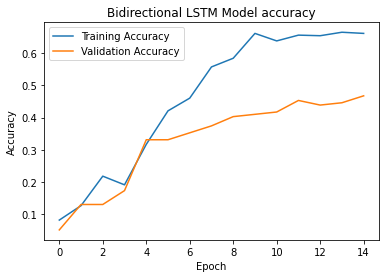

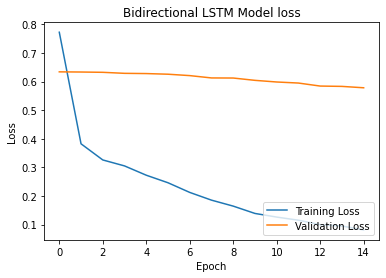

In [ ]:
# Plot Training & Validation Accuracy with the Loss values of the Bidirectional LSTM Model

# Plot training & validation accuracy values
plt.plot(Bil_LSTM_model_fit.history['accuracy'])
plt.plot(Bil_LSTM_model_fit.history['val_accuracy'])
plt.title('Bidirectional LSTM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Bil_LSTM_model_fit.history['loss'])
plt.plot(Bil_LSTM_model_fit.history['val_loss'])
plt.title('Bidirectional LSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## Algoritme 9: **GRU without pre-trained embedding**

In [ ]:
sequence_input = Input(shape=(max_len, ))
model = Embedding(input_dim=max_features, output_dim=embedding_dims, trainable = False)(sequence_input)
model = SpatialDropout1D(0.2)(model)
model = GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1)(model)
model = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(model)
avg_pool = GlobalAveragePooling1D()(model)
max_pool = GlobalMaxPooling1D()(model)
model = concatenate([avg_pool, max_pool])
preds = Dense(16, activation="sigmoid")(model)
GRU_model = Model(sequence_input, preds)

GRU_model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-3),metrics=['accuracy', mean_pred, f1_m, precision, recall])
GRU_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding_23 (Embedding)       (None, 200, 128)     25600000    ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d_11 (SpatialD  (None, 200, 128)    0           ['embedding_23[0][0]']           
 ropout1D)                                                                                        
                                                                                                  
 gru (GRU)                      (None, 200, 128)     99072       ['spatial_dropout1d_11[0][0]'

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
GRU_model_fit = GRU_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Epoch 1/15
3/3 [==============================] - 6s 1s/step - loss: 0.6860 - accuracy: 0.0935 - mean_pred: 0.4922 - f1_m: 0.2019 - precision: 0.1430 - recall: 0.3750 - val_loss: 0.6540 - val_accuracy: 0.0432 - val_mean_pred: 0.4749 - val_f1_m: 0.2319 - val_precision: 0.2047 - val_recall: 0.2674
Epoch 2/15
3/3 [==============================] - 5s 2s/step - loss: 0.6403 - accuracy: 0.0773 - mean_pred: 0.4601 - f1_m: 0.1972 - precision: 0.2745 - recall: 0.1722 - val_loss: 0.5868 - val_accuracy: 0.2590 - val_mean_pred: 0.4271 - val_f1_m: 0.0453 - val_precision: 0.8571 - val_recall: 0.0233
Epoch 3/15
3/3 [==============================] - 3s 931ms/step - loss: 0.5620 - accuracy: 0.2212 - mean_pred: 0.3951 - f1_m: 0.0267 - precision: 0.2146 - recall: 0.0150 - val_loss: 0.4689 - val_accuracy: 0.2590 - val_mean_pred: 0.3237 - val_f1_m: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.4362 - accuracy: 0.2212

In [ ]:
# Evaluate the GRU Model train and test score

#Train
GRU_train_score = GRU_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', GRU_train_score[0])
print('Train Accuracy:', GRU_train_score[1])

#Test
GRU_test_score = GRU_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', GRU_test_score[0])
print('Test Accuracy:', GRU_test_score[1])

3/3 [==============================] - 1s 171ms/step - loss: 0.3159 - accuracy: 0.2212 - mean_pred: 0.1211 - f1_m: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Train Loss: 0.3158741593360901
Train Accuracy: 0.22122302651405334
1/1 [==============================] - 0s 219ms/step - loss: 0.3040 - accuracy: 0.3046 - mean_pred: 0.1197 - f1_m: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Test Loss: 0.30399441719055176
Test Accuracy: 0.3045977056026459


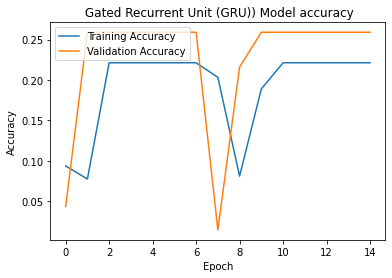

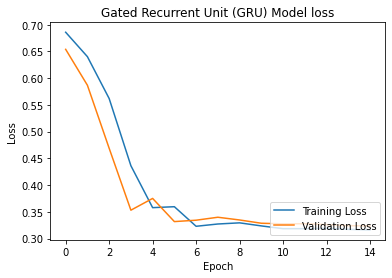

In [ ]:
# Plot Training & Validation Accuracy with the Loss values of the GRU Model

# Plot training & validation accuracy values
plt.plot(GRU_model_fit.history['accuracy'])
plt.plot(GRU_model_fit.history['val_accuracy'])
plt.title(' Gated Recurrent Unit (GRU)) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(GRU_model_fit.history['loss'])
plt.plot(GRU_model_fit.history['val_loss'])
plt.title('Gated Recurrent Unit (GRU) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## Algoritme 10: **Bidirectional GRU without pre-trained embedding**

In [ ]:
sequence_input = Input(shape=(max_len, ))
model = Embedding(input_dim=max_features, output_dim=embedding_dims, trainable = False)(sequence_input)
model = SpatialDropout1D(0.2)(model)
model = Bidirectional(GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(model)
model = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(model)
avg_pool = GlobalAveragePooling1D()(model)
max_pool = GlobalMaxPooling1D()(model)
model = concatenate([avg_pool, max_pool])
preds = Dense(16, activation="sigmoid")(model)
Bil_GRU_model = Model(sequence_input, preds)

Bil_GRU_model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-3),metrics=['accuracy', mean_pred, f1_m, precision, recall])
Bil_GRU_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding_24 (Embedding)       (None, 200, 128)     25600000    ['input_2[0][0]']                
                                                                                                  
 spatial_dropout1d_12 (SpatialD  (None, 200, 128)    0           ['embedding_24[0][0]']           
 ropout1D)                                                                                        
                                                                                                  
 bidirectional_3 (Bidirectional  (None, 200, 256)    198144      ['spatial_dropout1d_12[0][0

In [ ]:
Bil_GRU_model_fit = Bil_GRU_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Epoch 1/15
3/3 [==============================] - 13s 2s/step - loss: 0.6808 - accuracy: 0.0054 - mean_pred: 0.4862 - f1_m: 0.0966 - precision: 0.0922 - recall: 0.1958 - val_loss: 0.6267 - val_accuracy: 0.2086 - val_mean_pred: 0.4553 - val_f1_m: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
3/3 [==============================] - 6s 2s/step - loss: 0.6053 - accuracy: 0.1565 - mean_pred: 0.4300 - f1_m: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5229 - val_accuracy: 0.2590 - val_mean_pred: 0.3714 - val_f1_m: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
3/3 [==============================] - 6s 2s/step - loss: 0.4887 - accuracy: 0.2212 - mean_pred: 0.3227 - f1_m: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3883 - val_accuracy: 0.2590 - val_mean_pred: 0.2148 - val_f1_m: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
3/3 [==============================] 

In [ ]:
# Evaluate the GRU Model train and test score

#Train
Bil_GRU_train_score = Bil_GRU_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', Bil_GRU_train_score[0])
print('Train Accuracy:', Bil_GRU_train_score[1])

#Test
Bil_GRU_test_score = Bil_GRU_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', Bil_GRU_test_score[0])
print('Test Accuracy:', Bil_GRU_test_score[1])

3/3 [==============================] - 1s 322ms/step - loss: 0.3146 - accuracy: 0.2212 - mean_pred: 0.1174 - f1_m: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Train Loss: 0.3146435618400574
Train Accuracy: 0.22122302651405334
1/1 [==============================] - 0s 433ms/step - loss: 0.3033 - accuracy: 0.3046 - mean_pred: 0.1162 - f1_m: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Test Loss: 0.3032502233982086
Test Accuracy: 0.3045977056026459


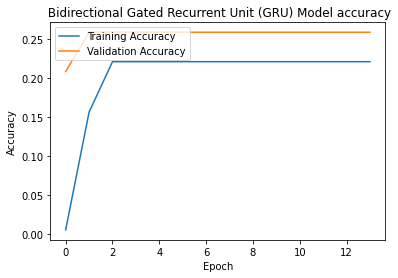

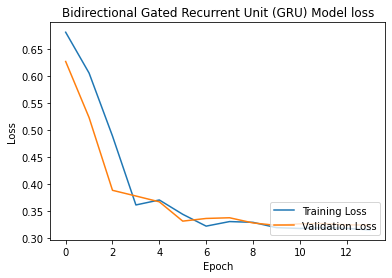

In [ ]:
# Plot Training & Validation Accuracy with the Loss values of the Bil GRU Model

# Plot training & validation accuracy values
plt.plot(Bil_GRU_model_fit.history['accuracy'])
plt.plot(Bil_GRU_model_fit.history['val_accuracy'])
plt.title(' Bidirectional Gated Recurrent Unit (GRU) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Bil_GRU_model_fit.history['loss'])
plt.plot(Bil_GRU_model_fit.history['val_loss'])
plt.title('Bidirectional Gated Recurrent Unit (GRU) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## HASIL **WITHOUT PRE-TRAINED EMBEDDING**

In [ ]:
# concat all training, validation and testing accuracy scores
NN_Accuracy = ['Neural Network',
               np.mean(nn_model_fit.history['accuracy']),
               np.mean(nn_model_fit.history['val_accuracy']),
               nn_test_score[1]]

CNN_Accuracy = ['Convolutional Neural Network (CNN)',
                np.mean(CNN_model_fit.history['accuracy']),
                np.mean(CNN_model_fit.history['val_accuracy']),
                CNN_test_score[1]]

RNN_Accuracy = ['Recurrent Neural Networks (RNNs)',
                np.mean(RNN_model_fit.history['accuracy']),
                np.mean(RNN_model_fit.history['val_accuracy']),
                RNN_test_score[1]]

LSTM_Accuracy = ['LSTM',
                  np.mean(LSTM_model_fit.history['accuracy']),
                  np.mean(LSTM_model_fit.history['val_accuracy']),
                  LSTM_test_score[1]]

Bidirectional_LSTM_Accuracy = ['Bidirectional LSTM',
                    np.mean(Bil_LSTM_model_fit.history['accuracy']),
                    np.mean(Bil_LSTM_model_fit.history['val_accuracy']),
                    Bil_LSTM_test_score[1]]

GRU_Accuracy = ['GRU',
                    np.mean(GRU_model_fit.history['accuracy']),
                    np.mean(GRU_model_fit.history['val_accuracy']),
                    GRU_test_score[1]]

Bidirectional_GRU_Accuracy = ['Bidirectional GRU',
                    np.mean(Bil_GRU_model_fit.history['accuracy']),
                    np.mean(Bil_GRU_model_fit.history['val_accuracy']),
                    Bil_GRU_test_score[1]]


# create dataframe
experimentalResult = pd.DataFrame([NN_Accuracy])
# append all other scores
experimentalResult = experimentalResult.append([CNN_Accuracy, RNN_Accuracy, LSTM_Accuracy, Bidirectional_LSTM_Accuracy,
                                                GRU_Accuracy, Bidirectional_GRU_Accuracy])


# beautify the new dataframe
experimentalResult.columns = ['Model', 'Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']
experimentalResult.set_index(['Model'], inplace=True)
experimentalResult

,Training Accuracy,Validation Accuracy,Testing Accuracy
Model,,,
Neural Network,0.237290,0.308873,0.597701
Convolutional Neural Network (CNN),0.314029,0.134532,0.160920
Recurrent Neural Networks (RNNs),0.208513,0.225420,0.304598
LSTM,0.514560,0.455238,0.620690
Bidirectional LSTM,0.459592,0.327098,0.534483
GRU,0.190408,0.225420,0.304598
Bidirectional GRU,0.201182,0.255396,0.304598


## Glove pretrained indonesia - LSTM

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1jgnvIEp8rE3dh68lZXBHfyxzmeky9z6w&confirm=t'
#iglove_50dim_wiki.id (yudi wibisono, 2018) https://yudiwbs.wordpress.com/2018/04/02/glove-untuk-wikipedia-bahasa-indonesia/

# renaming filename
import os
for index, file in enumerate(os.listdir()):
  if file=='uc?export=download&id=1jgnvIEp8rE3dh68lZXBHfyxzmeky9z6w&confirm=t':
    index_file_torename = index                       #index from file that will be renamed
dst ='glove_50dim_wiki.id.case.text.txt'              #change it to the destination name
os.rename(os.listdir()[index_file_torename], dst)     #rename it

In [ ]:
embeddings_dictionary = dict()

# download glove_50dim_wiki dari https://drive.google.com/file/d/1jgnvIEp8rE3dh68lZXBHfyxzmeky9z6w/view?usp=sharing
glove_file = open('/content/glove_50dim_wiki.id.case.text.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

# create a weight matrix
embedding_matrix = np.zeros((vocab_size, 50)) #shape: (length of vocab_size, 50 dimensions of embedding) artinya jumlah baris = total vocab dalam vocab_size, dan di setiap baris ada 50 word embedding sesuai dg GloVe corpus bhs indo 50dim yg kita unduh
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
deep_inputs = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim =embedding_matrix.shape[0], #equal to vocab_size
                            input_length=max_len, #equal to 200 words only that we will use for word embedding
                            output_dim=embedding_matrix.shape[1], #equal to 50 dim
                            weights=[embedding_matrix],
                            trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(16, activation='sigmoid')(LSTM_Layer_1)
LSTM_Glove_model = Model(inputs=deep_inputs, outputs=dense_layer_1)

LSTM_Glove_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', mean_pred, f1_m, precision, recall])
LSTM_Glove_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_27 (Embedding)    (None, 200, 50)           67950     
                                                                 
 lstm_6 (LSTM)               (None, 128)               91648     
                                                                 
 dense_50 (Dense)            (None, 16)                2064      
                                                                 
Total params: 161,662
Trainable params: 93,712
Non-trainable params: 67,950
_________________________________________________________________


In [ ]:
LSTM_Glove_model_fit = LSTM_Glove_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_split=val_split, callbacks=[early])

Epoch 1/15
3/3 [==============================] - 4s 805ms/step - loss: 0.6595 - accuracy: 0.1584 - mean_pred: 0.4738 - f1_m: 0.2222 - precision: 0.1603 - recall: 0.3928 - val_loss: 0.5974 - val_accuracy: 0.2714 - val_mean_pred: 0.4381 - val_f1_m: 0.2069 - val_precision: 0.1824 - val_recall: 0.2389
Epoch 2/15
3/3 [==============================] - 2s 521ms/step - loss: 0.5705 - accuracy: 0.2256 - mean_pred: 0.4090 - f1_m: 0.2343 - precision: 0.2961 - recall: 0.2020 - val_loss: 0.5142 - val_accuracy: 0.2571 - val_mean_pred: 0.3690 - val_f1_m: 0.2012 - val_precision: 0.3036 - val_recall: 0.1504
Epoch 3/15
3/3 [==============================] - 2s 509ms/step - loss: 0.4819 - accuracy: 0.2432 - mean_pred: 0.3301 - f1_m: 0.1090 - precision: 0.3503 - recall: 0.0668 - val_loss: 0.4376 - val_accuracy: 0.2571 - val_mean_pred: 0.2885 - val_f1_m: 0.0480 - val_precision: 0.2500 - val_recall: 0.0265
Epoch 4/15
3/3 [==============================] - 2s 529ms/step - loss: 0.4047 - accuracy: 0.2432 - 

In [ ]:
# Evaluate the LSTM Model accuracy of our train and test accuracy

LSTM_Glove_train_score = LSTM_Glove_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', LSTM_Glove_train_score[0])
print('Train Accuracy:', LSTM_Glove_train_score[1])


LSTM_Glove_test_score = LSTM_Glove_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', LSTM_Glove_test_score[0])
print('Test Accuracy:', LSTM_Glove_test_score[1])

3/3 [==============================] - 1s 155ms/step - loss: 0.2958 - accuracy: 0.2464 - mean_pred: 0.1174 - f1_m: 0.0103 - precision: 0.5000 - recall: 0.0052
Train Loss: 0.2957553565502167
Train Accuracy: 0.24640287458896637
1/1 [==============================] - 0s 190ms/step - loss: 0.2851 - accuracy: 0.3161 - mean_pred: 0.1161 - f1_m: 0.0067 - precision: 0.3333 - recall: 0.0034
Test Loss: 0.28509682416915894
Test Accuracy: 0.31609195470809937


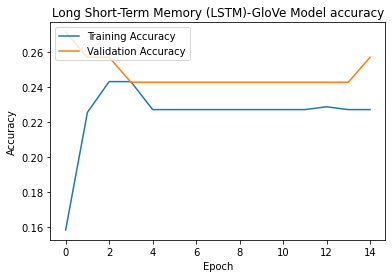

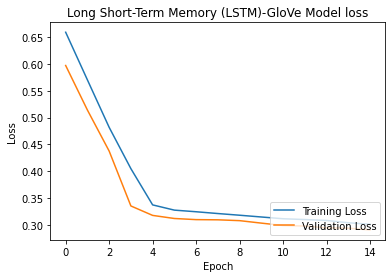

In [ ]:
# Plot Training & Validation Accuracy with the Loss values of the LSTM Model

# Plot training & validation accuracy values
plt.plot(LSTM_Glove_model_fit.history['accuracy'])
plt.plot(LSTM_Glove_model_fit.history['val_accuracy'])
plt.title('Long Short-Term Memory (LSTM)-GloVe Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training<<<<<<<<<<<<<<<<<<<
plt.plot(LSTM_Glove_model_fit.history['loss'])
plt.plot(LSTM_Glove_model_fit.history['val_loss'])
plt.title('Long Short-Term Memory (LSTM)-GloVe Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [ ]:
# Convert the word embedding into tokenized vector
# We mapped the embeddings from the loaded word2vec model so that each word to the tokenizer_obj.word_index vocabulary and create a matrix with of word vectors.

num_words = len(word_index)+1
word2Vec_embedding_matrix = np.zeros((num_words, 300))

for word, i  in word_index.items():
    if i > num_words:
        continue
    word2Vec_embedding_vector = word2Vec_embeddings_index.get(word)
    if word2Vec_embedding_vector is not None:
        #words not found in embedding index will be all-zeros.
        word2Vec_embedding_matrix[i] = word2Vec_embedding_vector

print(num_words)
print(word2Vec_embedding_matrix.shape[0])
print(word2Vec_embedding_matrix.shape[1])

1420
1420
300


## Word2vec pretrained indonesia

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1X5ZPsaoXFxJFrcJ7pVkV9VC81lmDIzdI&confirm=t'
#idwiki_word2vec_300 (deryrahman, 2019)

# renaming filename
import os
for index, file in enumerate(os.listdir()):
  if file=='uc?export=download&id=1X5ZPsaoXFxJFrcJ7pVkV9VC81lmDIzdI&confirm=t':
    index_file_torename = index                       #index from file that will be renamed
dst ='idwiki_word2vec_300.zip'                        #change it to the destination name
os.rename(os.listdir()[index_file_torename], dst)     #rename it

# unzipping file
import zipfile
with zipfile.ZipFile('/content/idwiki_word2vec_300.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
import gensim

path = 'idwiki_word2vec_300.model'
id_w2v = gensim.models.Word2Vec.load(path)
print(id_w2v.most_similar('batuk'))

<ipython-input-14-aebcbe7a828d>:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(id_w2v.most_similar('batuk'))


[('diare', 0.8474545478820801), ('mual', 0.8142539262771606), ('muntah', 0.8124041557312012), ('pilek', 0.8119508624076843), ('gatal', 0.8116698265075684), ('nyeri', 0.7907618284225464), ('kejang', 0.7902830839157104), ('radang', 0.78618985414505), ('bronkitis', 0.7859195470809937), ('bisul', 0.7818225622177124)]


In [ ]:
list(id_w2v.wv.vocab)[500:510] #take a look at some vocabs in pre-trained word2vec model

['kesia',
 'jetway',
 'salva',
 'veinticinco',
 'villesse',
 'edfrans',
 'wight',
 'hmo',
 'dibalutkan',
 'rangrasiya']

In [ ]:
from nltk.tokenize import word_tokenize
import string

In [ ]:
list_kalimat_clean = list()
list_kalimat = df['Kalimat (sesuai KBBI)'].values.tolist()

for kalimat in list_kalimat:
    tokens = word_tokenize(kalimat)

    #convert to lower case
    tokens = [w.lower() for w in tokens]

    #remove punctuation from each word
    table =  str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    #remove remaining tpkens gthat are not alphabetic
    words = [word for word in stripped if word.isalpha()]

    #filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    list_kalimat_clean.append(words)

len(list_kalimat_clean)

869

In [ ]:
# Save the Word2Vec Corpus locally

#save model
filename = 'bayi_pretrained_embedding_word2vec.txt'
id_w2v.wv.save_word2vec_format(filename, binary=False)

In [ ]:
# Use the Pre-Trained Embedding (Word2Vec) in our models (CNN, and RNN)

import os

word2Vec_embeddings_index = {}
word2vec_file = open(os.path.join('', 'bayi_pretrained_embedding_word2vec.txt'), encoding = "utf-8")

for line in word2vec_file:
    values = line.split()
    word = values[0]
    coefficient = np.asarray(values[1:])
    word2Vec_embeddings_index[word] = coefficient
word2vec_file.close()

In [ ]:
#vectorize the text samples into a 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(list_kalimat_clean)
sequences = tokenizer_obj.texts_to_sequences(list_kalimat_clean)

#pad sequences
word_index = tokenizer_obj.word_index
print('Found %s uniquue tokens.' % len(word_index))

kalimat_pad = pad_sequences(sequences, maxlen=max_len)
kalimat_tag = df[categories].values
print('Shape of kalimat tensor', kalimat_pad.shape)
print('Shape of tag kalimat tensor', kalimat_tag.shape)

Found 1419 uniquue tokens.
Shape of kalimat tensor (869, 200)
Shape of tag kalimat tensor (869, 16)


In [ ]:
# Convert the word embedding into tokenized vector
# We mapped the embeddings from the loaded word2vec model so that each word to the tokenizer_obj.word_index vocabulary and create a matrix with of word vectors.

num_words = len(word_index)+1
word2Vec_embedding_matrix = np.zeros((num_words, 300)) # 300 is embedding_dim

for word, i  in word_index.items():
    if i > num_words:
        continue
    word2Vec_embedding_vector = word2Vec_embeddings_index.get(word)
    if word2Vec_embedding_vector is not None:
        #words not found in embedding index will be all-zeros.
        word2Vec_embedding_matrix[i] = word2Vec_embedding_vector

print(num_words)
print(word2Vec_embedding_matrix.shape[0])
print(word2Vec_embedding_matrix.shape[1])

1420
1420
300


## Word2vec pretrained indonesia - CNN

In [ ]:
CNN_Word2Vec_model = Sequential([
    Embedding(input_dim =word2Vec_embedding_matrix.shape[0], input_length=max_len, output_dim=word2Vec_embedding_matrix.shape[1],weights=[word2Vec_embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    # ... 100 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
    Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch,
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.
    #It will be added after the activation function between a convolutional and a max-pooling layer.
    BatchNormalization(),
    GlobalMaxPool1D(),
    Dropout(0.5),
    Dense(50, activation = 'relu'),
    Dense(16, activation = 'sigmoid')
])
CNN_Word2Vec_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, f1_m, precision, recall])
CNN_Word2Vec_model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 200, 300)          426000    
                                                                 
 spatial_dropout1d_15 (Spati  (None, 200, 300)         0         
 alDropout1D)                                                    
                                                                 
 conv1d_7 (Conv1D)           (None, 200, 100)          120100    
                                                                 
 batch_normalization_13 (Bat  (None, 200, 100)         400       
 chNormalization)                                                
                                                                 
 global_max_pooling1d_27 (Gl  (None, 100)              0         
 obalMaxPooling1D)                                               
                                                     

In [ ]:
CNN_Word2Vec_model_fit = CNN_Word2Vec_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_split=val_split, callbacks=[early])

Epoch 1/15
3/3 [==============================] - 3s 516ms/step - loss: 2.6931 - accuracy: 0.0800 - mean_pred: 0.3064 - f1_m: 0.2064 - precision: 0.1500 - recall: 0.3657 - val_loss: 0.7039 - val_accuracy: 0.3143 - val_mean_pred: 0.0683 - val_f1_m: 0.3077 - val_precision: 0.4643 - val_recall: 0.2301
Epoch 2/15
3/3 [==============================] - 1s 381ms/step - loss: 1.1230 - accuracy: 0.1264 - mean_pred: 0.0793 - f1_m: 0.2147 - precision: 0.2862 - recall: 0.1757 - val_loss: 1.1277 - val_accuracy: 0.3571 - val_mean_pred: 0.0533 - val_f1_m: 0.2840 - val_precision: 0.4694 - val_recall: 0.2035
Epoch 3/15
3/3 [==============================] - 1s 374ms/step - loss: 0.8693 - accuracy: 0.2256 - mean_pred: 0.0840 - f1_m: 0.2568 - precision: 0.3323 - recall: 0.2107 - val_loss: 0.9339 - val_accuracy: 0.3429 - val_mean_pred: 0.0757 - val_f1_m: 0.3351 - val_precision: 0.4306 - val_recall: 0.2743
Epoch 4/15
3/3 [==============================] - 1s 373ms/step - loss: 0.6378 - accuracy: 0.2544 - 

In [ ]:
CNN_Word2Vec_train_score = CNN_Word2Vec_model.evaluate(X_train, y_train, batch_size=batch_size2, verbose=1)
print('Train Loss:', CNN_Word2Vec_train_score[0])
print('Train Accuracy:', CNN_Word2Vec_train_score[1])

3/3 [==============================] - 1s 162ms/step - loss: 0.3166 - accuracy: 0.3626 - mean_pred: 0.0950 - f1_m: 0.3394 - precision: 0.4987 - recall: 0.2575
Train Loss: 0.3165701627731323
Train Accuracy: 0.36258992552757263


In [ ]:
# Evaluate the CNN+Word2Vec accuracy base our test samples

CNN_Word2Vec_test_score = CNN_Word2Vec_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', CNN_Word2Vec_test_score[0])
print('Test Accuracy:', CNN_Word2Vec_test_score[1])

1/1 [==============================] - 0s 137ms/step - loss: 0.3142 - accuracy: 0.4253 - mean_pred: 0.0968 - f1_m: 0.3524 - precision: 0.5031 - recall: 0.2712
Test Loss: 0.31420692801475525
Test Accuracy: 0.4252873659133911


In [ ]:
#Predicting......
print('Predicting....')
y_pred = CNN_Word2Vec_model.predict(X_test,batch_size=batch_size2,verbose=1)

Predicting....
1/1 [==============================] - 0s 194ms/step


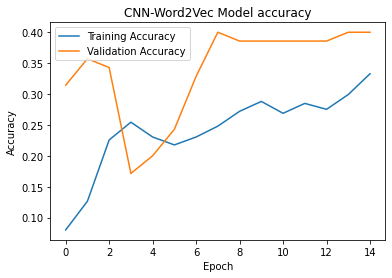

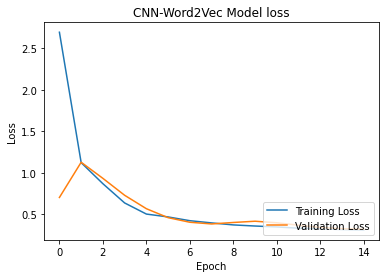

In [ ]:
# Plot Training & Validation Accuracy with the Loss values of the CNN-Word2Vec Model

# Plot training & validation accuracy values
plt.plot(CNN_Word2Vec_model_fit.history['accuracy'])
plt.plot(CNN_Word2Vec_model_fit.history['val_accuracy'])
plt.title('CNN-Word2Vec Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(CNN_Word2Vec_model_fit.history['loss'])
plt.plot(CNN_Word2Vec_model_fit.history['val_loss'])
plt.title('CNN-Word2Vec Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## Word2vec pretrained indonesia - LSTM

In [ ]:
LSTM_Word2Vec_model = Sequential([
    Embedding(input_dim =word2Vec_embedding_matrix.shape[0], input_length=max_len, output_dim=word2Vec_embedding_matrix.shape[1],weights=[word2Vec_embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    LSTM(128, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch,
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(16, activation = 'sigmoid')
])

LSTM_Word2Vec_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, f1_m, precision, recall ])
LSTM_Word2Vec_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 300)          426000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 300)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 200, 128)          219648    
                                                                 
 batch_normalization_1 (Batc  (None, 200, 128)         512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 200, 128)          0         
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)             

In [ ]:
LSTM_Word2Vec_model_fit = LSTM_Word2Vec_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_split=val_split, callbacks=[early])

Epoch 1/15
3/3 [==============================] - 7s 1s/step - loss: 2.4561 - accuracy: 0.0432 - mean_pred: 0.3282 - f1_m: 0.1673 - precision: 0.1252 - recall: 0.3068 - val_loss: 0.5337 - val_accuracy: 0.0429 - val_mean_pred: 0.3808 - val_f1_m: 0.1176 - val_precision: 0.1056 - val_recall: 0.1327
Epoch 2/15
3/3 [==============================] - 3s 893ms/step - loss: 0.6331 - accuracy: 0.1120 - mean_pred: 0.1107 - f1_m: 0.1906 - precision: 0.2592 - recall: 0.1656 - val_loss: 0.4797 - val_accuracy: 0.3000 - val_mean_pred: 0.3447 - val_f1_m: 0.2083 - val_precision: 0.4839 - val_recall: 0.1327
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.4097 - accuracy: 0.1920 - mean_pred: 0.1095 - f1_m: 0.2450 - precision: 0.4007 - recall: 0.1780 - val_loss: 0.4827 - val_accuracy: 0.3143 - val_mean_pred: 0.3512 - val_f1_m: 0.0174 - val_precision: 0.5000 - val_recall: 0.0088
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.3217 - accuracy: 0.2672 - mean_pred

In [ ]:
# Evaluate the RNN+Word2Vec Model accuracy of our trained model

LSTM_Word2Vec_train_score = LSTM_Word2Vec_model.evaluate(X_train, y_train, batch_size=batch_size2, verbose=1)
print('Train Loss:', LSTM_Word2Vec_train_score[0])
print('Train Accuracy:', LSTM_Word2Vec_train_score[1])

3/3 [==============================] - 1s 370ms/step - loss: 0.4242 - accuracy: 0.4187 - mean_pred: 0.3084 - f1_m: 0.1588 - precision: 0.9547 - recall: 0.0866
Train Loss: 0.424232542514801
Train Accuracy: 0.4187050461769104


In [ ]:
# Evaluate the RNN+Word2Vec accuracy base our test samples

LSTM_Word2Vec_test_score = LSTM_Word2Vec_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', LSTM_Word2Vec_test_score[0])
print('Test Accuracy:', LSTM_Word2Vec_test_score[1])

1/1 [==============================] - 0s 378ms/step - loss: 0.4210 - accuracy: 0.5000 - mean_pred: 0.3066 - f1_m: 0.1486 - precision: 0.8571 - recall: 0.0814
Test Loss: 0.4210250675678253
Test Accuracy: 0.5


In [ ]:
#Predicting......
print('Predicting....')
y_pred = LSTM_Word2Vec_model.predict(X_test,batch_size=batch_size2,verbose=1)

#F1-score result of NN
index=0
f1_score_word2vecpretrained_LSTM = []
for category in categories:
  print(category)

  # finding best threshold
  fpr, tpr, thresholds = roc_curve(test[category], y_pred[:, index])
  auc = roc_auc_score(test[category], y_pred[:, index])
  gmeans = np.sqrt(tpr * (1-fpr))
  ix = np.argmax(gmeans)

  #print f1 score of each label
  print(f1_score(test[category], np.where(y_pred[:,index]<thresholds[ix],0,1)))
  f1_score_word2vecpretrained_LSTM.append(f1_score(test[category], np.where(y_pred[:,index]<thresholds[ix],0,1)))
  index=+1

Predicting....
1/1 [==============================] - 0s 336ms/step
Pasien
0.5454545454545455
Usia Pasien
0.761904761904762
Penyakit
0.1791044776119403
Gejala
0.20512820512820512
Kapan
0.16129032258064516
Periode
0.21621621621621623
Tindakan
0.5853658536585367
Outcome
0.421875
Pertanyaan
0.21739130434782608
Pembuka
0.13114754098360656
Penyebab
0.25352112676056343
Prakondisi
0.45045045045045046
Observasi
0.32
Objek
0.2
Penutup
0.05882352941176471
Referensi


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


ValueError: ignored

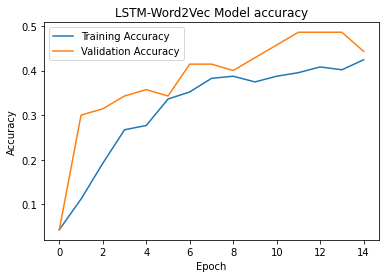

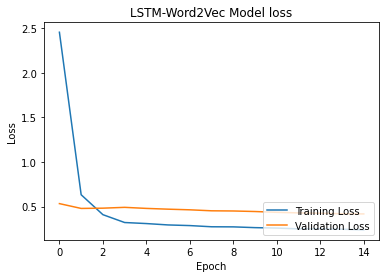

In [ ]:
# Plot Training & Validation Accuracy with the Loss values of the RNN-Word2Vec Model

# Plot training & validation accuracy values
plt.plot(LSTM_Word2Vec_model_fit.history['accuracy'])
plt.plot(LSTM_Word2Vec_model_fit.history['val_accuracy'])
plt.title('LSTM-Word2Vec Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(LSTM_Word2Vec_model_fit.history['loss'])
plt.plot(LSTM_Word2Vec_model_fit.history['val_loss'])
plt.title('LSTM-Word2Vec Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()


## Word2vec without pretrained - CNN

In [ ]:
# list_kalimat_clean = list()
# list_kalimat = df['Kalimat (sesuai KBBI)'].values.tolist()

# for kalimat in list_kalimat:
#     tokens = word_tokenize(kalimat)

#     #convert to lower case
#     tokens = [w.lower() for w in tokens]

#     #remove punctuation from each word
#     table =  str.maketrans('', '', string.punctuation)
#     stripped = [w.translate(table) for w in tokens]

#     #remove remaining tpkens gthat are not alphabetic
#     words = [word for word in stripped if word.isalpha()]

#     #filter out stop words
#     stop_words = set(stopwords.words('english'))
#     words = [w for w in words if not w in stop_words]
#     list_kalimat_clean.append(words)

# len(list_kalimat_clean)

869

In [ ]:
#train word2vec mode
embedding_dims = 128 #embedding vector output dimension
max_len = 200 #Max. number of words per toxic comment to be use
word2VecModel = gensim.models.Word2Vec(sentences=list_kalimat_clean, size= embedding_dims, window=10, min_count=5)
#vocab size
wors = list(word2VecModel.wv.vocab)
print('Vocabulary size: %d' % len(wors))

Vocabulary size: 461


In [ ]:
# Save the Word2Vec Corpus locally

#save model
filename = 'bayi_embedding_word2vec.txt'
word2VecModel.wv.save_word2vec_format(filename, binary=False)

In [ ]:
# Use the Pre-Trained Embedding (Word2Vec) in our models (CNN, and RNN)

import os

word2Vec_embeddings_index = {}
word2vec_file = open(os.path.join('', 'bayi_embedding_word2vec.txt'), encoding = "utf-8")

for line in word2vec_file:
    values = line.split()
    word = values[0]
    coefficient = np.asarray(values[1:])
    word2Vec_embeddings_index[word] = coefficient
word2vec_file.close()

In [ ]:
# #vectorize the text samples into a 2D integer tensor
# tokenizer_obj = Tokenizer()
# tokenizer_obj.fit_on_texts(list_kalimat_clean)
# sequences = tokenizer_obj.texts_to_sequences(list_kalimat_clean)

# #pad sequences
# word_index = tokenizer_obj.word_index
# print('Found %s uniquue tokens.' % len(word_index))

# kalimat_pad = pad_sequences(sequences, maxlen=max_len)
# kalimat_tag = df[categories].values
# print('Shape of kalimat tensor', kalimat_pad.shape)
# print('Shape of tag kalimat tensor', kalimat_tag.shape)

Found 1419 uniquue tokens.
Shape of kalimat tensor (869, 200)
Shape of tag kalimat tensor (869, 16)


In [ ]:
# Convert the word embedding into tokenized vector
# We mapped the embeddings from the loaded word2vec model so that each word to the tokenizer_obj.word_index vocabulary and create a matrix with of word vectors.

num_words = len(word_index)+1
word2Vec_embedding_matrix = np.zeros((num_words, 128))

for word, i  in word_index.items():
    if i > num_words:
        continue
    word2Vec_embedding_vector = word2Vec_embeddings_index.get(word)
    if word2Vec_embedding_vector is not None:
        #words not found in embedding index will be all-zeros.
        word2Vec_embedding_matrix[i] = word2Vec_embedding_vector

print(num_words)
print(word2Vec_embedding_matrix.shape[0])
print(word2Vec_embedding_matrix.shape[1])

1420
1420
128


In [ ]:
word2VecModel.wv.most_similar('batuk')

[('dan', 0.9997771978378296),
 ('napas', 0.9997732639312744),
 ('alami', 0.9997695088386536),
 ('yang', 0.9997687339782715),
 ('normal', 0.9997659921646118),
 ('bersih', 0.9997658729553223),
 ('namun', 0.999764084815979),
 ('pasti', 0.999764084815979),
 ('air', 0.9997636079788208),
 ('keluh', 0.9997618198394775)]

In [ ]:
CNN_Word2Vec_model = Sequential([
    Embedding(input_dim =word2Vec_embedding_matrix.shape[0], input_length=max_len, output_dim=word2Vec_embedding_matrix.shape[1],weights=[word2Vec_embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    # ... 100 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
    Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch,
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.
    #It will be added after the activation function between a convolutional and a max-pooling layer.
    BatchNormalization(),
    GlobalMaxPool1D(),
    Dropout(0.5),
    Dense(50, activation = 'relu'),
    Dense(16, activation = 'sigmoid')
])
CNN_Word2Vec_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, f1_m, precision, recall])
CNN_Word2Vec_model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, 200, 128)          181760    
                                                                 
 spatial_dropout1d_16 (Spati  (None, 200, 128)         0         
 alDropout1D)                                                    
                                                                 
 conv1d_8 (Conv1D)           (None, 200, 100)          51300     
                                                                 
 batch_normalization_14 (Bat  (None, 200, 100)         400       
 chNormalization)                                                
                                                                 
 global_max_pooling1d_28 (Gl  (None, 100)              0         
 obalMaxPooling1D)                                               
                                                     

In [ ]:
CNN_Word2Vec_model_fit = CNN_Word2Vec_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_split=val_split, callbacks=[early])

Epoch 1/15
3/3 [==============================] - 2s 326ms/step - loss: 1.7852 - accuracy: 0.0704 - mean_pred: 0.2897 - f1_m: 0.2016 - precision: 0.1591 - recall: 0.3339 - val_loss: 0.4098 - val_accuracy: 0.2429 - val_mean_pred: 0.2362 - val_f1_m: 0.2529 - val_precision: 0.3607 - val_recall: 0.1947
Epoch 2/15
3/3 [==============================] - 1s 217ms/step - loss: 0.7979 - accuracy: 0.1184 - mean_pred: 0.0925 - f1_m: 0.1432 - precision: 0.2015 - recall: 0.1111 - val_loss: 0.3996 - val_accuracy: 0.2429 - val_mean_pred: 0.1896 - val_f1_m: 0.2529 - val_precision: 0.3607 - val_recall: 0.1947
Epoch 3/15
3/3 [==============================] - 1s 216ms/step - loss: 0.6057 - accuracy: 0.1504 - mean_pred: 0.1211 - f1_m: 0.1764 - precision: 0.2206 - recall: 0.1492 - val_loss: 0.4394 - val_accuracy: 0.0571 - val_mean_pred: 0.2399 - val_f1_m: 0.2419 - val_precision: 0.2222 - val_recall: 0.2655
Epoch 4/15
3/3 [==============================] - 1s 205ms/step - loss: 0.5001 - accuracy: 0.1056 - 

In [ ]:
CNN_Word2Vec_train_score = CNN_Word2Vec_model.evaluate(X_train, y_train, batch_size=batch_size2, verbose=1)
print('Train Loss:', CNN_Word2Vec_train_score[0])
print('Train Accuracy:', CNN_Word2Vec_train_score[1])

3/3 [==============================] - 0s 73ms/step - loss: 0.3978 - accuracy: 0.0791 - mean_pred: 0.2408 - f1_m: 0.0583 - precision: 0.2960 - recall: 0.0326
Train Loss: 0.39779117703437805
Train Accuracy: 0.0791366919875145


In [ ]:
# Evaluate the CNN+Word2Vec accuracy base our test samples

CNN_Word2Vec_test_score = CNN_Word2Vec_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', CNN_Word2Vec_test_score[0])
print('Test Accuracy:', CNN_Word2Vec_test_score[1])

1/1 [==============================] - 0s 72ms/step - loss: 0.3901 - accuracy: 0.1149 - mean_pred: 0.2404 - f1_m: 0.0928 - precision: 0.3200 - recall: 0.0542
Test Loss: 0.39009958505630493
Test Accuracy: 0.1149425283074379


In [ ]:
#Predicting......
print('Predicting....')
y_pred = CNN_Word2Vec_model.predict(X_test,batch_size=batch_size2,verbose=1)

Predicting....
1/1 [==============================] - 0s 145ms/step


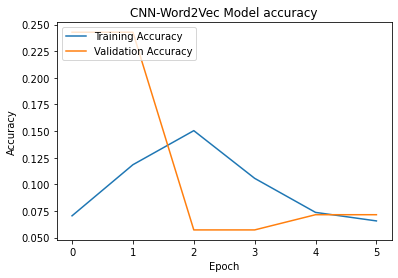

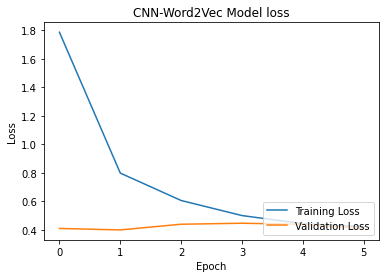

In [ ]:
# Plot Training & Validation Accuracy with the Loss values of the CNN-Word2Vec Model

# Plot training & validation accuracy values
plt.plot(CNN_Word2Vec_model_fit.history['accuracy'])
plt.plot(CNN_Word2Vec_model_fit.history['val_accuracy'])
plt.title('CNN-Word2Vec Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(CNN_Word2Vec_model_fit.history['loss'])
plt.plot(CNN_Word2Vec_model_fit.history['val_loss'])
plt.title('CNN-Word2Vec Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## Fasttext pretrained indonesia - LSTM

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz

--2022-12-05 04:41:50--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 172.67.9.4, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1227018698 (1.1G) [binary/octet-stream]
Saving to: ‘cc.id.300.vec.gz’

cc.id.300.vec.gz    100%[===================>]   1.14G  35.1MB/s    in 28s     

2022-12-05 04:42:19 (41.1 MB/s) - ‘cc.id.300.vec.gz’ saved [1227018698/1227018698]



In [ ]:
import gzip
import shutil
with gzip.open('/content/cc.id.300.vec.gz', 'rb') as f_in:
    with open('cc.id.300.vec', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
# Load the FastText Word Embeddng Corpus

#load embeddings
print('loading word embeddings...')
fastText_embeddings_index = {}
f = codecs.open('cc.id.300.vec', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    fastText_embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(fastText_embeddings_index))

loading word embeddings...


2000001it [02:04, 16025.72it/s]

found 2000000 word vectors


In [ ]:
#embedding matrix
print('preparing embedding matrix...')
max_nb_words = 100000
fastText_embed_dim = 300

words_not_found = []
nb_words = min(max_nb_words, len(word_index))
fastText_embedding_matrix = np.zeros((nb_words, fastText_embed_dim))
for word, i in word_index.items():
    if i >= nb_words:
        continue
    fastText_embedding_vector = fastText_embeddings_index.get(word)
    if (fastText_embedding_vector is not None) and len(fastText_embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        fastText_embedding_matrix[i] = fastText_embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(fastText_embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 46


In [ ]:
print(nb_words)

1419


In [ ]:
LSTM_FastText_model = Sequential([
    Embedding(input_dim =fastText_embedding_matrix.shape[0], input_length=max_len, output_dim=fastText_embedding_matrix.shape[1],weights=[fastText_embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    LSTM(64, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch,
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(16, activation = 'sigmoid')
])

LSTM_FastText_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, f1_m, precision, recall])
LSTM_FastText_model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_33 (Embedding)    (None, 200, 300)          425700    
                                                                 
 spatial_dropout1d_18 (Spati  (None, 200, 300)         0         
 alDropout1D)                                                    
                                                                 
 lstm_8 (LSTM)               (None, 200, 64)           93440     
                                                                 
 batch_normalization_16 (Bat  (None, 200, 64)          256       
 chNormalization)                                                
                                                                 
 dropout_28 (Dropout)        (None, 200, 64)           0         
                                                                 
 global_max_pooling1d_30 (Gl  (None, 64)             

In [ ]:
LSTM_FastText_model_fit = LSTM_FastText_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_split=val_split, callbacks=[early])

Epoch 1/15
3/3 [==============================] - 5s 763ms/step - loss: 0.7688 - accuracy: 0.1008 - mean_pred: 0.3257 - f1_m: 0.2189 - precision: 0.1837 - recall: 0.3702 - val_loss: 0.6539 - val_accuracy: 0.0571 - val_mean_pred: 0.4743 - val_f1_m: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
3/3 [==============================] - 2s 492ms/step - loss: 0.3852 - accuracy: 0.1024 - mean_pred: 0.1155 - f1_m: 0.1544 - precision: 0.2694 - recall: 0.1105 - val_loss: 0.6429 - val_accuracy: 0.0571 - val_mean_pred: 0.4677 - val_f1_m: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
3/3 [==============================] - 1s 461ms/step - loss: 0.3241 - accuracy: 0.2352 - mean_pred: 0.1278 - f1_m: 0.2102 - precision: 0.4961 - recall: 0.1397 - val_loss: 0.6389 - val_accuracy: 0.0571 - val_mean_pred: 0.4656 - val_f1_m: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
3/3 [==============================] - 1s 467ms/step 

In [ ]:
# Evaluate the RNN+fastText Model accuracy of our trained model

LSTM_FastText_train_score = LSTM_FastText_model.evaluate(X_train, y_train, batch_size=batch_size2, verbose=1)
print('Train Loss:', LSTM_FastText_train_score[0])
print('Train Accuracy:', LSTM_FastText_train_score[1])

# Evaluate the RNN+FastText accuracy base our test samples

LSTM_FastText_test_score = LSTM_FastText_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', LSTM_FastText_test_score[0])
print('Test Accuracy:', LSTM_FastText_test_score[1])

3/3 [==============================] - 1s 198ms/step - loss: 0.5947 - accuracy: 0.3022 - mean_pred: 0.4400 - f1_m: 0.0817 - precision: 0.9495 - recall: 0.0428
Train Loss: 0.5946803092956543
Train Accuracy: 0.30215826630592346
1/1 [==============================] - 0s 182ms/step - loss: 0.5935 - accuracy: 0.3046 - mean_pred: 0.4390 - f1_m: 0.0200 - precision: 0.6000 - recall: 0.0102
Test Loss: 0.5934982299804688
Test Accuracy: 0.3045977056026459


In [ ]:
#Predicting......
print('Predicting....')
y_pred = LSTM_FastText_model.predict(X_test,batch_size=batch_size2,verbose=1)

Predicting....
1/1 [==============================] - 1s 572ms/step


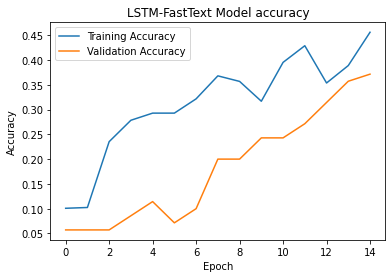

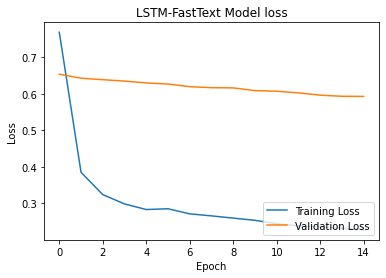

In [ ]:
# Plot Training & Validation Accuracy with the Loss values of the RNN-fastText Model

# Plot training & validation accuracy values
plt.plot(LSTM_FastText_model_fit.history['accuracy'])
plt.plot(LSTM_FastText_model_fit.history['val_accuracy'])
plt.title('LSTM-FastText Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(LSTM_FastText_model_fit.history['loss'])
plt.plot(LSTM_FastText_model_fit.history['val_loss'])
plt.title('LSTM-FastText Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()